# Power grid example case 39: New England Noisy version


$\Gamma = 0$,

__case-39 New England__

Node configuration: 10 Generators + 10 Terminals + 29 Loads

Perburbations = large

Splitting time-series according to perturbation points

$\Gamma = 0$,

Perburbations = large

Splitting time-series according to perturbation points

In [1]:
import numpy as np
from scipy.integrate import odeint
import pandas as pd
import warnings
pd.set_option('display.float_format', '{:0.8f}'.format)
import operator

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.sparse import coo_array

from os import path

## Loading data

In [2]:
#Name of the folder with the time series and other files
# folder_name_1 = "case39bus9gen_halfperturb"
folder_name_1 = "case39bus10gen_onetenthperturb"

#Name that needs to be appending to the beginning of other files
folder_name = "case_39bus10gen_newengland"
folder_location = path.join("powergrid","Datasets", folder_name_1)

#### Reading time series data and skipping rows to sub sample

In [3]:
# #Trimming original time series to reduce the number of data points
# data_matrix_df_orig = pd.read_csv(path.join(folder_location, "{}_timeseries.csv".format(folder_name)))
# skip_n_rows_btw = 10
# rows_to_keep = np.arange(0, len(data_matrix_df_orig), skip_n_rows_btw)

# data_matrix_df = data_matrix_df_orig.iloc[rows_to_keep].reset_index(drop=True)

# data_matrix_df.to_csv(path.join(folder_location, "{}_trimmed_time_series.csv".format(folder_name)), index=False)

In [4]:
data_matrix_df = pd.read_csv(path.join(folder_location, "{}_trimmed_time_series.csv".format(folder_name)))

In [5]:
data_matrix_df

,time,PhaseGen1,PhaseGen2,PhaseGen3,PhaseGen4,PhaseGen5,PhaseGen6,PhaseGen7,PhaseGen8,PhaseGen9,...,ReactivePowerLoad20,ReactivePowerLoad21,ReactivePowerLoad22,ReactivePowerLoad23,ReactivePowerLoad24,ReactivePowerLoad25,ReactivePowerLoad26,ReactivePowerLoad27,ReactivePowerLoad28,ReactivePowerLoad29
0,0.00000000,-0.10549836,0.00000000,0.01107847,0.01988585,-0.00398084,0.05276848,0.09987475,-0.00809098,0.09006077,...,-1.28326173,-1.45722942,-0.41494594,-1.22979590,0.71957610,-0.82294700,-0.36920976,-0.79869356,-0.40498421,-0.69750703
1,0.00100000,-0.10547281,0.00002351,0.01110184,0.01990891,-0.00395744,0.05279056,0.09989662,-0.00806738,0.09008199,...,-1.23300241,-1.43658590,-0.47135852,-1.31685552,0.72959373,-0.81646623,-0.36399281,-0.79610900,-0.39564845,-0.84855166
2,0.00200000,-0.10539116,0.00009362,0.01117135,0.01997638,-0.00388901,0.05285341,0.09995739,-0.00799716,0.09013997,...,-1.20042297,-1.42254003,-0.46483580,-1.32907188,0.73998165,-0.80745590,-0.35901890,-0.79537174,-0.39354023,-0.86009621
3,0.00300000,-0.10525003,0.00020932,0.01128628,0.02008572,-0.00377910,0.05295426,0.10005248,-0.00788207,0.09023018,...,-1.18381194,-1.41165848,-0.45336222,-1.32320902,0.74755702,-0.79976746,-0.35468063,-0.79478541,-0.39190719,-0.85140811
4,0.00400000,-0.10504914,0.00036912,0.01144578,0.02023423,-0.00363130,0.05309136,0.10017908,-0.00772435,0.09035011,...,-1.17278613,-1.40167818,-0.44031451,-1.31159566,0.75411081,-0.79243738,-0.35023632,-0.79397215,-0.38946713,-0.83670051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59998,59.99510000,0.10535827,0.19535954,0.20573623,0.21370018,0.19243179,0.23210294,0.28236127,0.18644968,0.26882029,...,-1.02956613,-1.14978549,0.00086420,-0.84696430,0.92196443,-0.47176621,-0.17062381,-0.75510386,-0.27635451,-0.27032175
59999,59.99610000,0.10536056,0.19535583,0.20574099,0.21369219,0.19244025,0.23210190,0.28236144,0.18641849,0.26882241,...,-1.02955453,-1.14978436,0.00086466,-0.84696069,0.92196545,-0.47184018,-0.17062009,-0.75510512,-0.27634987,-0.27030414
60000,59.99710000,0.10536286,0.19535217,0.20574566,0.21368425,0.19244863,0.23210080,0.28236167,0.18638735,0.26882456,...,-1.02954302,-1.14978327,0.00086496,-0.84695691,0.92196649,-0.47191405,-0.17061631,-0.75510638,-0.27634521,-0.27028644
60001,59.99810000,0.10536515,0.19534854,0.20575027,0.21367638,0.19245694,0.23209964,0.28236196,0.18635626,0.26882675,...,-1.02953160,-1.14978222,0.00086510,-0.84695295,0.92196753,-0.47198783,-0.17061249,-0.75510762,-0.27634052,-0.27026867


In [6]:
def get_node_index(label):
    if len(label) >0 and label[-1].isnumeric():
        return get_node_index(label[:-1]) + label[-1]
    else:
        return ""

def node_label_changer(column_label):
    node_index = get_node_index(column_label)
    if "PhaseGenTerm" in column_label:
        new_label = "Phi_T_{}".format(node_index)
    elif "PhaseGen" in column_label:
        new_label = "Phi_G_{}".format(node_index)
    elif "PhaseLoad" in column_label:
        new_label = "Phi_L_{}".format(node_index)
    elif "FreqGenTerm" in column_label:
        new_label = "om_T_{}".format(node_index)
    elif "FreqGen" in column_label:
        new_label = "om_G_{}".format(node_index)
    elif "FreqLoad" in column_label:
        new_label = "om_L_{}".format(node_index)
    elif "ActivePowerGenTerm" in column_label:
        new_label = "P_T_{}".format(node_index)
    elif "ActivePowerGen" in column_label:
        new_label = "P_G_{}".format(node_index)
    elif "ActivePowerLoad" in column_label:
        new_label = "P_L_{}".format(node_index)
    elif "ReactivePowerGenTerm" in column_label:
        new_label = "Q_T_{}".format(node_index)
    elif "ReactivePowerGen" in column_label:
        new_label = "Q_G_{}".format(node_index)
    elif "ReactivePowerLoad" in column_label:
        new_label = "Q_L_{}".format(node_index)
    else:
        new_label = column_label
    return new_label

In [7]:
column_label_dict = {column: node_label_changer(column) for column in data_matrix_df.columns}
column_label_dict

{'time': 'time',
 'PhaseGen1': 'Phi_G_1',
 'PhaseGen2': 'Phi_G_2',
 'PhaseGen3': 'Phi_G_3',
 'PhaseGen4': 'Phi_G_4',
 'PhaseGen5': 'Phi_G_5',
 'PhaseGen6': 'Phi_G_6',
 'PhaseGen7': 'Phi_G_7',
 'PhaseGen8': 'Phi_G_8',
 'PhaseGen9': 'Phi_G_9',
 'PhaseGen10': 'Phi_G_10',
 'PhaseGenTerm1': 'Phi_T_1',
 'PhaseGenTerm2': 'Phi_T_2',
 'PhaseGenTerm3': 'Phi_T_3',
 'PhaseGenTerm4': 'Phi_T_4',
 'PhaseGenTerm5': 'Phi_T_5',
 'PhaseGenTerm6': 'Phi_T_6',
 'PhaseGenTerm7': 'Phi_T_7',
 'PhaseGenTerm8': 'Phi_T_8',
 'PhaseGenTerm9': 'Phi_T_9',
 'PhaseGenTerm10': 'Phi_T_10',
 'PhaseLoad1': 'Phi_L_1',
 'PhaseLoad2': 'Phi_L_2',
 'PhaseLoad3': 'Phi_L_3',
 'PhaseLoad4': 'Phi_L_4',
 'PhaseLoad5': 'Phi_L_5',
 'PhaseLoad6': 'Phi_L_6',
 'PhaseLoad7': 'Phi_L_7',
 'PhaseLoad8': 'Phi_L_8',
 'PhaseLoad9': 'Phi_L_9',
 'PhaseLoad10': 'Phi_L_10',
 'PhaseLoad11': 'Phi_L_11',
 'PhaseLoad12': 'Phi_L_12',
 'PhaseLoad13': 'Phi_L_13',
 'PhaseLoad14': 'Phi_L_14',
 'PhaseLoad15': 'Phi_L_15',
 'PhaseLoad16': 'Phi_L_16',
 'PhaseLo

In [8]:
# new_column_names = ["time", "Phi_0", "Phi_1", "Phi_2", "Phi_3", "Phi_4", "Phi_5",
#                    "om_0", "om_1", "om_2", "om_3","om_4", "om_5", "P_0", "P_1", "P_2", "P_3", "P_4", "P_5",
#                    "Q_0", "Q_1", "Q_2", "Q_3", "Q_4", "Q_5"]

#Renaming the state variables for compactness
data_matrix_df.rename(columns= column_label_dict, inplace=True)

In [9]:
power_features = [feature for feature in data_matrix_df.columns if "P_" in feature]
freq_features = [feature for feature in data_matrix_df.columns if "om_" in feature]
phase_features = [feature for feature in data_matrix_df.columns if "Phi_" in feature]

K_features = [feature[2:] for feature in power_features]

In [10]:
#Removing Reactive power from the timeseries they are not needed for fitting 
non_reactive_columns = [column for column in data_matrix_df.columns if "Q" not in column]

data_matrix_df = data_matrix_df[non_reactive_columns]

In [11]:
data_matrix_df

,time,Phi_G_1,Phi_G_2,Phi_G_3,Phi_G_4,Phi_G_5,Phi_G_6,Phi_G_7,Phi_G_8,Phi_G_9,...,P_L_20,P_L_21,P_L_22,P_L_23,P_L_24,P_L_25,P_L_26,P_L_27,P_L_28,P_L_29
0,0.00000000,-0.10549836,0.00000000,0.01107847,0.01988585,-0.00398084,0.05276848,0.09987475,-0.00809098,0.09006077,...,0.22086020,-0.00000000,-3.96777289,-4.07945764,-0.00000000,0.36808880,-0.00000000,-0.00000000,-0.00000000,-6.07894876
1,0.00100000,-0.10547281,0.00002351,0.01110184,0.01990891,-0.00395744,0.05279056,0.09989662,-0.00806738,0.09008199,...,-3.58043910,-1.43932997,0.08272938,-2.52759867,-1.05870428,0.16507475,0.29318872,-0.83316165,-1.11352277,-2.37313725
2,0.00200000,-0.10539116,0.00009362,0.01117135,0.01997638,-0.00388901,0.05285341,0.09995739,-0.00799716,0.09013997,...,-4.60044982,-1.52978985,0.67537352,-1.79864575,-1.38682825,-0.43763644,0.26941300,-0.95890943,-1.07139267,-1.88366503
3,0.00300000,-0.10525003,0.00020932,0.01128628,0.02008572,-0.00377910,0.05295426,0.10005248,-0.00788207,0.09023018,...,-5.03855234,-1.51465407,0.83122462,-1.59965083,-1.51223018,-0.71195164,0.19207377,-1.03609355,-0.99933465,-1.86909939
4,0.00400000,-0.10504914,0.00036912,0.01144578,0.02023423,-0.00363130,0.05309136,0.10017908,-0.00772435,0.09035011,...,-5.30547892,-1.52051928,0.87451135,-1.56384332,-1.60023941,-0.84666383,0.11283456,-1.12255771,-0.98579519,-1.91249946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59998,59.99510000,0.10535827,0.19535954,0.20573623,0.21370018,0.19243179,0.23210294,0.28236127,0.18644968,0.26882029,...,-6.80013448,-2.73986631,0.00011778,-2.47489346,-3.08585603,-2.23914481,-1.38962210,-2.80969775,-2.05985365,-2.83493257
59999,59.99610000,0.10536056,0.19535583,0.20574099,0.21369219,0.19244025,0.23210190,0.28236144,0.18641849,0.26882241,...,-6.80013241,-2.73986555,0.00011909,-2.47489353,-3.08585585,-2.23914610,-1.38962355,-2.80969857,-2.05985633,-2.83493565
60000,59.99710000,0.10536286,0.19535217,0.20574566,0.21368425,0.19244863,0.23210080,0.28236167,0.18638735,0.26882456,...,-6.80013031,-2.73986481,0.00012040,-2.47489361,-3.08585569,-2.23914750,-1.38962503,-2.80969942,-2.05985902,-2.83493872
60001,59.99810000,0.10536515,0.19534854,0.20575027,0.21367638,0.19245694,0.23209964,0.28236196,0.18635626,0.26882675,...,-6.80012819,-2.73986407,0.00012169,-2.47489369,-3.08585555,-2.23914901,-1.38962656,-2.80970030,-2.05986170,-2.83494177


In [12]:
final_time = 59.9

In [13]:
data_matrix_df = data_matrix_df[data_matrix_df["time"] <= final_time]

<Axes: >

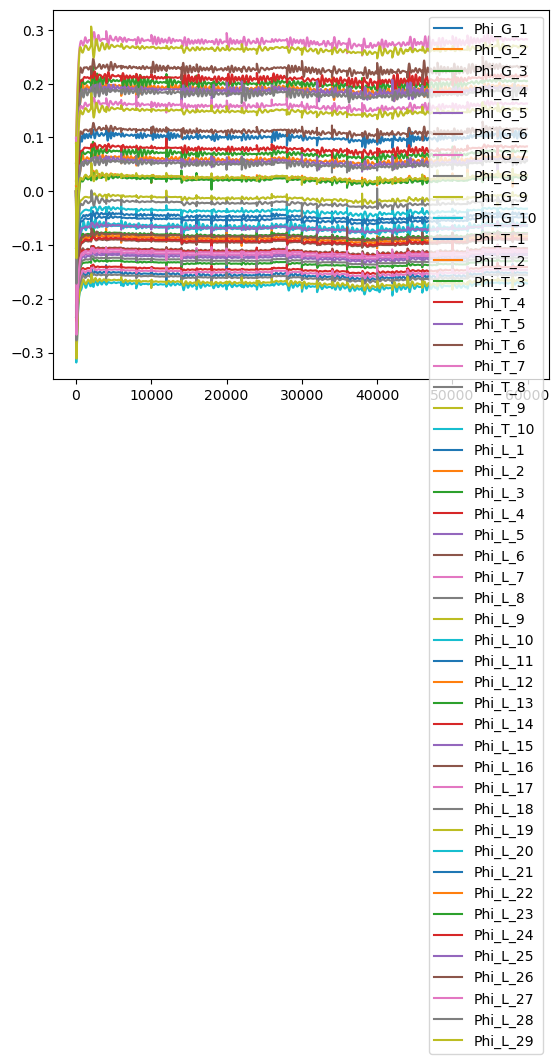

In [14]:
data_matrix_df[phase_features].plot()

In [15]:
data_matrix_df

,time,Phi_G_1,Phi_G_2,Phi_G_3,Phi_G_4,Phi_G_5,Phi_G_6,Phi_G_7,Phi_G_8,Phi_G_9,...,P_L_20,P_L_21,P_L_22,P_L_23,P_L_24,P_L_25,P_L_26,P_L_27,P_L_28,P_L_29
0,0.00000000,-0.10549836,0.00000000,0.01107847,0.01988585,-0.00398084,0.05276848,0.09987475,-0.00809098,0.09006077,...,0.22086020,-0.00000000,-3.96777289,-4.07945764,-0.00000000,0.36808880,-0.00000000,-0.00000000,-0.00000000,-6.07894876
1,0.00100000,-0.10547281,0.00002351,0.01110184,0.01990891,-0.00395744,0.05279056,0.09989662,-0.00806738,0.09008199,...,-3.58043910,-1.43932997,0.08272938,-2.52759867,-1.05870428,0.16507475,0.29318872,-0.83316165,-1.11352277,-2.37313725
2,0.00200000,-0.10539116,0.00009362,0.01117135,0.01997638,-0.00388901,0.05285341,0.09995739,-0.00799716,0.09013997,...,-4.60044982,-1.52978985,0.67537352,-1.79864575,-1.38682825,-0.43763644,0.26941300,-0.95890943,-1.07139267,-1.88366503
3,0.00300000,-0.10525003,0.00020932,0.01128628,0.02008572,-0.00377910,0.05295426,0.10005248,-0.00788207,0.09023018,...,-5.03855234,-1.51465407,0.83122462,-1.59965083,-1.51223018,-0.71195164,0.19207377,-1.03609355,-0.99933465,-1.86909939
4,0.00400000,-0.10504914,0.00036912,0.01144578,0.02023423,-0.00363130,0.05309136,0.10017908,-0.00772435,0.09035011,...,-5.30547892,-1.52051928,0.87451135,-1.56384332,-1.60023941,-0.84666383,0.11283456,-1.12255771,-0.98579519,-1.91249946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59898,59.89510000,0.10536700,0.19580309,0.20500846,0.21452323,0.19149035,0.23194737,0.28263603,0.18902727,0.26886264,...,-6.80017079,-2.73998034,-0.00001320,-2.47490929,-3.08594182,-2.23957684,-1.38969400,-2.80978646,-2.05962272,-2.83460257
59899,59.89610000,0.10536305,0.19579938,0.20501667,0.21451736,0.19149781,0.23195081,0.28263089,0.18901371,0.26885916,...,-6.80017216,-2.73997906,-0.00001222,-2.47490885,-3.08594040,-2.23956770,-1.38969123,-2.80978400,-2.05962420,-2.83460547
59900,59.89710000,0.10535919,0.19579562,0.20502490,0.21451139,0.19150537,0.23195422,0.28262578,0.18899979,0.26885576,...,-6.80017349,-2.73997777,-0.00001122,-2.47490841,-3.08593900,-2.23955864,-1.38968850,-2.80978158,-2.05962572,-2.83460839
59901,59.89810000,0.10535543,0.19579183,0.20503314,0.21450532,0.19151302,0.23195762,0.28262071,0.18898551,0.26885242,...,-6.80017479,-2.73997649,-0.00001021,-2.47490798,-3.08593760,-2.23954964,-1.38968580,-2.80977918,-2.05962726,-2.83461133


<Axes: >

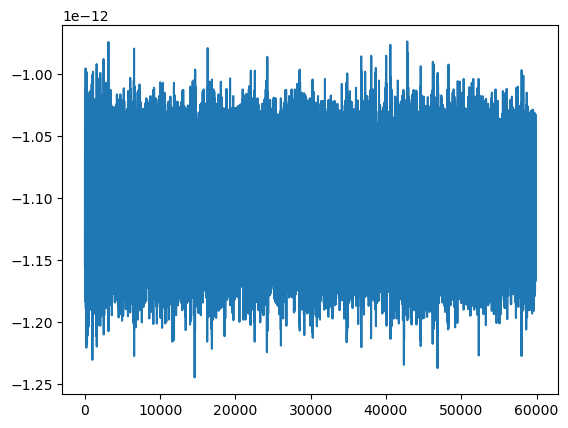

In [16]:
data_matrix_df[power_features].sum(axis=1).plot()

### Reading gamma values 

In [17]:
gamma_df = pd.read_csv(path.join(folder_location, "{}_gamma.csv".format(folder_name)), names=K_features)

In [18]:
gamma_df

,G_1,G_2,G_3,G_4,G_5,G_6,G_7,G_8,G_9,G_10,...,L_20,L_21,L_22,L_23,L_24,L_25,L_26,L_27,L_28,L_29
0,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
1,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
2,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
3,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
4,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
5,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
6,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
7,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
8,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
9,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-3.14160000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


### Splitting the time-series with respect to the perturbation points

In [19]:
#Getting perturbations time points
perturbation_points_df = pd.read_csv(path.join(folder_location, "{}_timepoints.csv".format(folder_name)))

perturbation_points_df = perturbation_points_df[perturbation_points_df["Perturbation timepoints"] <= final_time]

In [20]:
perturbation_time_point_list = perturbation_points_df["Perturbation timepoints"]
# perturbation_time_point_list

In [21]:
perturbation_time_point_list

0      0
1      2
2      4
3      6
4      8
5     10
6     12
7     14
8     16
9     18
10    20
11    22
12    24
13    26
14    28
15    30
16    32
17    34
18    36
19    38
20    40
21    42
22    44
23    46
24    48
25    50
26    52
27    54
28    56
29    58
Name: Perturbation timepoints, dtype: int64

In [22]:
#Splitting the data_matrix with the timeseries into a list of timeseries dataframes based on where the perturbation is introduced
#The purpose of this step is to smoothen each of perturbation segment independently using splines and find the derivaties
#This will avoid jumps in the derivative due to the discontinuity at the perturbanc time point

data_matrix_df_list =[data_matrix_df[(ind_i < data_matrix_df["time"]) & (data_matrix_df["time"] < ind_j) ] 
                       for ind_i, ind_j in zip(perturbation_time_point_list[:-1], perturbation_time_point_list[1:])]


data_matrix_df_appended = pd.concat(data_matrix_df_list, ignore_index=True)

data_matrix_df_appended

,time,Phi_G_1,Phi_G_2,Phi_G_3,Phi_G_4,Phi_G_5,Phi_G_6,Phi_G_7,Phi_G_8,Phi_G_9,...,P_L_20,P_L_21,P_L_22,P_L_23,P_L_24,P_L_25,P_L_26,P_L_27,P_L_28,P_L_29
0,0.00100000,-0.10547281,0.00002351,0.01110184,0.01990891,-0.00395744,0.05279056,0.09989662,-0.00806738,0.09008199,...,-3.58043910,-1.43932997,0.08272938,-2.52759867,-1.05870428,0.16507475,0.29318872,-0.83316165,-1.11352277,-2.37313725
1,0.00200000,-0.10539116,0.00009362,0.01117135,0.01997638,-0.00388901,0.05285341,0.09995739,-0.00799716,0.09013997,...,-4.60044982,-1.52978985,0.67537352,-1.79864575,-1.38682825,-0.43763644,0.26941300,-0.95890943,-1.07139267,-1.88366503
2,0.00300000,-0.10525003,0.00020932,0.01128628,0.02008572,-0.00377910,0.05295426,0.10005248,-0.00788207,0.09023018,...,-5.03855234,-1.51465407,0.83122462,-1.59965083,-1.51223018,-0.71195164,0.19207377,-1.03609355,-0.99933465,-1.86909939
3,0.00400000,-0.10504914,0.00036912,0.01144578,0.02023423,-0.00363130,0.05309136,0.10017908,-0.00772435,0.09035011,...,-5.30547892,-1.52051928,0.87451135,-1.56384332,-1.60023941,-0.84666383,0.11283456,-1.12255771,-0.98579519,-1.91249946
4,0.00500000,-0.10478975,0.00057134,0.01164878,0.02041933,-0.00344886,0.05326311,0.10033512,-0.00752623,0.09049795,...,-5.50027655,-1.54904295,0.87479650,-1.57672777,-1.67916262,-0.93341408,0.03682159,-1.21255438,-1.00692327,-1.95757216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57992,57.99520000,0.10515461,0.19512066,0.20580244,0.21386713,0.19178119,0.23137348,0.28278104,0.18602556,0.26916486,...,-6.79973315,-2.74003991,-0.00021278,-2.47487778,-3.08587313,-2.23977409,-1.39026079,-2.81010737,-2.06086509,-2.83605519
57993,57.99620000,0.10513926,0.19511013,0.20580973,0.21385247,0.19178528,0.23138734,0.28276674,0.18602088,0.26917880,...,-6.79973315,-2.74004002,-0.00021323,-2.47487745,-3.08587285,-2.23977532,-1.39026037,-2.81010708,-2.06086327,-2.83605281
57994,57.99720000,0.10512393,0.19509965,0.20581690,0.21383780,0.19178937,0.23140123,0.28275241,0.18601623,0.26919270,...,-6.79973316,-2.74004010,-0.00021362,-2.47487712,-3.08587257,-2.23977659,-1.39025994,-2.81010679,-2.06086138,-2.83605035
57995,57.99820000,0.10510863,0.19508922,0.20582395,0.21382313,0.19179347,0.23141513,0.28273805,0.18601159,0.26920656,...,-6.79973317,-2.74004016,-0.00021395,-2.47487680,-3.08587231,-2.23977791,-1.39025951,-2.81010650,-2.06085944,-2.83604781


#### Loading admittance matrix, Y

In [23]:
admittance_Y_df = pd.read_csv(path.join(folder_location, "{}_Y.csv".format(folder_name)), names=K_features)
admittance_Y_df.set_index(pd.Index(K_features), inplace=True)
for column in admittance_Y_df.columns:
    admittance_Y_df[column] = admittance_Y_df[column].apply(lambda x: x.replace('i', 'j'))

In [24]:
admittance_Y_df

,G_1,G_2,G_3,G_4,G_5,G_6,G_7,G_8,G_9,G_10,...,L_20,L_21,L_22,L_23,L_24,L_25,L_26,L_27,L_28,L_29
G_1,0-14.118j,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_2,0,0-47.356j,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_3,0,0,0-48.892j,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_4,0,0,0,0-47.139j,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_5,0,0,0,0,0-35.487j,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_6,0,0,0,0,0,0-48.892j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_7,0,0,0,0,0,0,0-40.281j,0,0,0,...,0,0,0,0,0,0,0,0,0,0
G_8,0,0,0,0,0,0,0,0-38.421j,0,0,...,0,0,0,0,0,0,0,0,0,0
G_9,0,0,0,0,0,0,0,0,0-67.182j,0,...,0,0,0,0,0,0,0,0,0,0
G_10,0,0,0,0,0,0,0,0,0,0-85.596j,...,0,0,0,0,0,0,0,0,0,0


#### Loading static parameters

In [25]:
static_param_df = pd.read_csv(path.join(folder_location, "{}_staticparams.csv".format(folder_name)))

In [26]:
static_param_df

,V,A,omega_R,D,H
0,1.04990000,2.50000000,376.99111843,50,10.00000000
1,0.98200000,6.34230000,376.99111843,50,25.36920000
2,0.98410000,6.50000000,376.99111843,50,26.00000000
3,0.99720000,6.32000000,376.99111843,50,25.28000000
4,1.01230000,5.08000000,376.99111843,50,20.32000000
5,1.04940000,6.50000000,376.99111843,50,26.00000000
6,1.06360000,5.60000000,376.99111843,50,22.40000000
7,1.02750000,5.40000000,376.99111843,50,21.60000000
8,1.02650000,8.30000000,376.99111843,50,33.20000000
9,1.03000000,10.00000000,376.99111843,50,40.00000000


#### Loading coupling matrix, K

In [27]:
coupling_K_df = pd.read_csv(path.join(folder_location, "{}_K.csv".format(folder_name)), names=K_features)
coupling_K_df.set_index(pd.Index(K_features), inplace=True)

In [28]:
coupling_K_df

,G_1,G_2,G_3,G_4,G_5,G_6,G_7,G_8,G_9,G_10,...,L_20,L_21,L_22,L_23,L_24,L_25,L_26,L_27,L_28,L_29
G_1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_2,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_3,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_4,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_5,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_6,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_7,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_8,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_9,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
G_10,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


In [29]:
coupling_matrix_true = coupling_K_df .to_numpy()
coupling_matrix_true

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   , 73.629],
       [ 0.   ,  0.   ,  0.   , ...,  0.   , 73.629,  0.   ]])

In [30]:
gamma_matrix = gamma_df.to_numpy()
admittance_Y_matrix = admittance_Y_df.to_numpy()

gamma_matrix

array([[-3.1416,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    , -3.1416,  0.    , ...,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    , -3.1416, ...,  0.    ,  0.    ,  0.    ],
       ...,
       [ 0.    ,  0.    ,  0.    , ..., -3.1416,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    , -3.1416,  0.    ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    , -3.1416]])

In [31]:
coupling_matrix_init = np.ones(admittance_Y_matrix.shape)
# coupling_matrix_init = np.zeros(admittance_Y_matrix.shape)
# coupling_matrix_init[3,:] = 1

coupling_matrix_init = np.triu(coupling_matrix_init, 0)
coupling_matrix_init
sparse_coupling_matrix_init = coo_array(coupling_matrix_init)
sparse_coupling_matrix_init.toarray()

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Smoothening data and finding derivatives using splines

In [32]:
from dae_finder import add_noise_to_df

noise_perc = 0.001
# data_matrix_df_list = [data_matrix_df]
num_time_points = len(data_matrix_df_list[0])
data_matrix_features = data_matrix_df_list[0].columns
for ind, data_matrix_ in enumerate(data_matrix_df_list):
    t_exact = data_matrix_["time"]
    # noisy_data_df = add_noise_to_df(data_matrix_, noise_perc=noise_perc, random_seed=111)
    noise_arr = np.random.normal(size=data_matrix_.shape)
    noisy_data_df = data_matrix_ + (noise_perc/100)*(abs(data_matrix_))*noise_arr
    
    noisy_data_df["time"] = t_exact
    data_matrix_df_list[ind] = noisy_data_df

In [33]:
# from copy import deepcopy
# from scipy import interpolate
# from dae_finder import der_label 
# import itertools
# def smooth_data(data_matrix,
#                 domain_var="t",
#                 smooth_method ="spline",
#                 s_param_=None,
#                 noise_perc=0,
#                 derr_order=1,
#                 eval_points=[],
#                 num_time_points=0):
#     """
#     :param data_matrix: Data matrix to smoothen. nxp data frame structure is assumed where n is the number of
#                         data points and p is the number of features (predictors).
#     :param domain_var: Domain variable with respect to which the data needs to be smoothened. Default is assumed to be
#                         "t" (time).
#     :param smooth_method: Numerical method used for smoothening.
#     :param s_param: smoothening parameter.
#     :param noise_perc: optional estimate of noise to signal ratio %
#     :param derr_order: Number of derivatives need to be calculated, wrt the domain variable, after smoothening the data.
#     :param eval_points: option list of points at which the smoothened data and derivatives will be evaluated for output
#     :return: pd.DataFrame of size len(eval_points) x k where k is the number of features and their derivatives.
#     """
#     assert domain_var in data_matrix, "domain variable not found in the data matrix"
#     s_param = deepcopy(s_param_)
#     data_t = data_matrix[domain_var]
#     if num_time_points == 0:
#         num_time_points = len(data_matrix)
#     if len(eval_points) == 0:
#         eval_points = np.linspace(data_t.iloc[0], data_t.iloc[-1], num_time_points)
#     t_eval_new = eval_points

#     data_matrix_ = data_matrix.drop(domain_var, axis=1)
#     data_matrix_std = data_matrix_.std()

#     data_matrix_smooth = pd.DataFrame(t_eval_new, columns=[domain_var])

#     if smooth_method == "spline":
#         if s_param:
#             s_param_list = [s_param for feature in data_matrix_]
#         else:
#             s_param_list = [num_time_points * (0.01 * noise_perc * data_matrix_std[feature]) ** 2 for
#                             feature in data_matrix_]
#         smoothened_values_list = [np.hstack([interpolate.splev(t_eval_new, interpolate.splrep(data_t,
#                                                                                               data_matrix_[feature],
#                                                                                               s=s_param_val), der=der_ind) [:, None]
#                                              for der_ind in range(derr_order + 1)])
#                                   for feature, s_param_val in zip(data_matrix_, s_param_list)]
#         smoothened_values = np.hstack(smoothened_values_list)
#         column_label_list = [[der_label(feature, der_ind) for der_ind in range(derr_order + 1)]
#                              for feature in data_matrix_]
#         column_label_list = list(itertools.chain.from_iterable(column_label_list))
#         print(len(column_label_list))
#         print(smoothened_values.shape)
#         smoothened_df = pd.DataFrame(smoothened_values, columns=column_label_list)
#         data_matrix_smooth = pd.concat([data_matrix_smooth, smoothened_df], axis=1)

#         # for feature in data_matrix_:
#         #     if not s_param:
#         #         # smoothing parameter: when equal weightage: num_data_points * std of data
#         #         s_param = num_time_points * (0.01 * noise_perc * data_matrix_std[feature]) ** 2
#         #     tck = interpolate.splrep(data_t, data_matrix_[feature], s=s_param)
#         #     for der_ind in range(derr_order + 1):
#         #         smoothed_data = interpolate.splev(t_eval_new, tck, der=der_ind)
#         #         data_matrix_smooth[der_label(feature, der_ind)] = smoothed_data
#     else:
#         raise "Smoothening type not supported"

#     return data_matrix_smooth

In [ ]:
from dae_finder import smooth_data

data_amplify_factor = 1
# Calling the smoothening function
data_matrix_smooth_df_list = [smooth_data(data_matrix, domain_var="time", derr_order=1, noise_perc=noise_perc, s_param_=0.000001,
                                         num_time_points=data_amplify_factor*len(data_matrix),
                                         silent = False) for
                              data_matrix in data_matrix_df_list]

if len(data_matrix_df_list) > 1:
    data_matrix_df_smooth_appended = pd.concat(data_matrix_smooth_df_list, ignore_index=True)
else:
    data_matrix_df_smooth_appended = data_matrix_smooth_df_list[0]

data_matrix_df_smooth = data_matrix_df_smooth_appended[data_matrix_features]
# if "time" in data_matrix_df_smooth:
#     data_matrix_df_smooth = data_matrix_df_smooth.drop("time", axis=1)

/opt/anaconda3/envs/pysindy_faster/lib/python3.12/site-packages/scipy/interpolate/_fitpack_py.py:295: RuntimeWarning: The maximal number of iterations (20) allowed for finding smoothing
spline with fp=s has been reached. Probable cause: s too small.
(abs(fp-s)/s>0.001)
  res = _impl.splrep(x, y, w, xb, xe, k, task, s, t, full_output, per, quiet)


294
(1999, 294)
Returning the smoothened data
294
(2000, 294)
Returning the smoothened data
294
(2000, 294)
Returning the smoothened data
294
(2000, 294)
Returning the smoothened data
294
(2000, 294)
Returning the smoothened data
294
(2000, 294)
Returning the smoothened data


In [58]:
data_matrix_df_smooth_appended

,time,Phi_G_1,d(Phi_G_1) /dt,Phi_G_2,d(Phi_G_2) /dt,Phi_G_3,d(Phi_G_3) /dt,Phi_G_4,d(Phi_G_4) /dt,Phi_G_5,...,P_L_25,d(P_L_25) /dt,P_L_26,d(P_L_26) /dt,P_L_27,d(P_L_27) /dt,P_L_28,d(P_L_28) /dt,P_L_29,d(P_L_29) /dt
0,0.00100000,-0.10588669,0.17667529,-0.00017596,0.11536136,0.01090958,0.10274793,0.01952425,0.16935077,-0.00415959,...,0.16507343,-837.23858473,0.29322196,22.96720337,-0.83320173,-173.82602962,-1.11352279,-11.66845074,-2.37312357,895.83474855
1,0.00200000,-0.10568681,0.22290642,-0.00004250,0.15139777,0.01103222,0.14235722,0.01970541,0.19286805,-0.00401496,...,-0.43763672,-403.34825809,0.26925852,-60.67043848,-0.95879732,-89.46056390,-1.07129384,76.57847764,-1.88378403,167.48514325
2,0.00300000,-0.10544125,0.26800684,0.00012654,0.18655022,0.01119397,0.18098568,0.01990981,0.21583206,-0.00384582,...,-0.71195619,-180.45723915,0.19232841,-82.96610806,-1.03631367,-77.66754446,-0.99946158,47.53817674,-1.86887163,-53.01952638
3,0.00400000,-0.10515117,0.31197653,0.00033030,0.22081872,0.01139386,0.21863329,0.02013689,0.23824281,-0.00365286,...,-0.84667066,-101.92461286,0.11265393,-77.27888950,-1.12234435,-90.51033520,-0.98566301,-9.83870834,-1.91266800,-42.05895208
4,0.00500000,-0.10481768,0.35481551,0.00056789,0.25420327,0.01163091,0.25530007,0.02038611,0.26010029,-0.00343677,...,-0.93342027,-76.23653957,0.03683614,-74.39516003,-1.21264178,-89.27544247,-1.00697828,-30.73346843,-1.95748465,-44.58371649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57992,57.99520000,0.10517076,-0.01367190,0.19509694,-0.01171436,0.20584931,0.00914444,0.21385172,-0.01562732,0.19178739,...,-2.23977167,0.00000648,-1.39025778,0.00051570,-2.81007266,0.00607151,-2.06085968,0.00196571,-2.83610218,-0.00921631
57993,57.99620000,0.10515712,-0.01361340,0.19508524,-0.01168762,0.20585840,0.00902940,0.21383607,-0.01567079,0.19179186,...,-2.23977161,0.00009950,-1.39025726,0.00052505,-2.81007769,-0.01811989,-2.06085768,0.00203651,-2.83609973,0.01638583
57994,57.99720000,0.10514354,-0.01355163,0.19507357,-0.01165952,0.20586737,0.00891258,0.21382038,-0.01571274,0.19179636,...,-2.23977147,0.00019908,-1.39025673,0.00053433,-2.81010494,-0.03043914,-2.06085561,0.00210736,-2.83607299,0.03126204
57995,57.99820000,0.10513002,-0.01348658,0.19506192,-0.01163006,0.20587622,0.00879400,0.21380465,-0.01575320,0.19180089,...,-2.23977121,0.00030524,-1.39025619,0.00054353,-2.81012666,-0.00703267,-2.06085347,0.00217826,-2.83604890,0.01105934


In [74]:
(data_matrix_df_smooth - data_matrix_df_appended).sum()

time      -0.00000000
Phi_G_1   -0.00041039
Phi_G_2    0.00036181
Phi_G_3   -0.00057633
Phi_G_4    0.00057131
              ...    
P_L_25    -0.00005198
P_L_26     0.00608540
P_L_27    -0.00906542
P_L_28    -0.00152962
P_L_29     0.00208539
Length: 148, dtype: float64

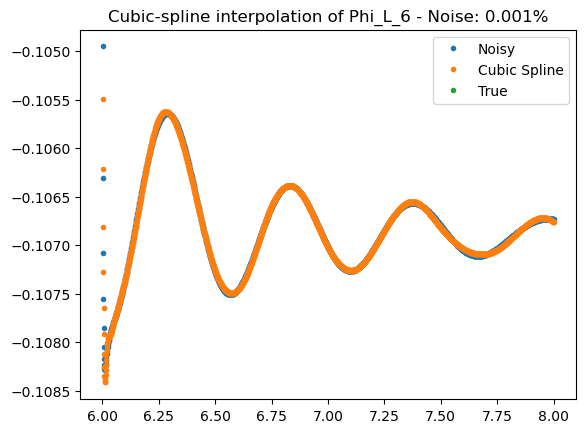

In [75]:
ind = 3
feature_ = "Phi_L_6"

plt.figure()
# plt.plot(data_matrix_df_list[1]["t"], data_matrix_df_list[1]["x"], "x", t_eval_new, x_new,
#         data_matrix_df[50:100]["t"], data_matrix_df[50:100]["x"], "o")

plt.plot(data_matrix_df_list[ind]["time"], data_matrix_df_list[ind][feature_], ".",
         data_matrix_smooth_df_list[ind]["time"],
         data_matrix_smooth_df_list[ind][feature_], ".",
         data_matrix_df_list[ind][ind * num_time_points:(ind + 1) * num_time_points]["time"],
         data_matrix_df_list[ind][ind * num_time_points:(ind + 1) * num_time_points][feature_], ".")
plt.legend(['Noisy', 'Cubic Spline', 'True'])
# plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation of {} - Noise: {}%'.format(feature_, noise_perc))
plt.show()

## Forming candidate library for powersystems

### Defining the sin interaction terms 

In [83]:
from dae_finder import FeatureCouplingTransformer

def coup_fun_sin_diff(x,y,i,j,gam_matrix):
    return np.sin(x-y- gam_matrix[i,j])

def coup_namer_sin_diff(x,y,i,j,gam_matrix=None):
    return "sin( {}-{} -gamma_{},{} )".format(x,y,i,j)


# def coup_fun_diff(x,y,i,j,gam_matrix):
#     return x-y- gam_matrix[i,j]

# def coup_namer_diff(x,y,i,j,gam_matrix):
#     return "{}-{} -gamma_{},{}".format(x,y,i,j)

transfomrer_sin_diff = FeatureCouplingTransformer(sparse_coupling_matrix_init,
                                           coupling_func= coup_fun_sin_diff,
                                           coupling_namer= coup_namer_sin_diff,
                                           coupling_func_args={"gam_matrix":gamma_matrix},
                                              return_df=True)

# transformer_diff = FeatureCouplingTransformer(sparse_coupling_matrix_init,
#                                            coupling_func= coup_fun_diff,
#                                            coupling_namer= coup_namer_diff,
#                                            coupling_func_args={"gam_matrix":gamma_matrix},
#                                               return_df=True)

In [77]:
data_matrix_df_comb = pd.concat(data_matrix_df_list, ignore_index=True)
data_matrix_df_smooth = data_matrix_df_comb
data_matrix_features = data_matrix_df_list[0].columns

In [84]:
#Creating library with sin(load angle difference)
sin_diff_library = transfomrer_sin_diff.fit_transform(data_matrix_df_smooth.drop(["time"], axis=1))
# sin_diff_library = transfomrer_sin_diff.fit_transform(data_matrix_df.drop(["time"], axis=1))

cop_ind = transfomrer_sin_diff.coupled_indices_list

# #Creating library with load angle difference
# diff_library = transformer_diff.fit_transform(data_matrix_df.drop(["time"], axis=1))


In [85]:
# candidate_lib = pd.concat([data_matrix_df.drop("time", axis=1), sin_diff_library], axis=1)

candidate_lib = pd.concat([data_matrix_df_smooth.drop("time", axis=1), sin_diff_library], axis=1)

In [86]:
candidate_lib

,Phi_G_1,Phi_G_2,Phi_G_3,Phi_G_4,Phi_G_5,Phi_G_6,Phi_G_7,Phi_G_8,Phi_G_9,Phi_G_10,...,"sin( Phi_L_26-Phi_L_26 -gamma_45,45 )","sin( Phi_L_26-Phi_L_27 -gamma_45,46 )","sin( Phi_L_26-Phi_L_28 -gamma_45,47 )","sin( Phi_L_26-Phi_L_29 -gamma_45,48 )","sin( Phi_L_27-Phi_L_27 -gamma_46,46 )","sin( Phi_L_27-Phi_L_28 -gamma_46,47 )","sin( Phi_L_27-Phi_L_29 -gamma_46,48 )","sin( Phi_L_28-Phi_L_28 -gamma_47,47 )","sin( Phi_L_28-Phi_L_29 -gamma_47,48 )","sin( Phi_L_29-Phi_L_29 -gamma_48,48 )"
0,-0.10588669,-0.00017596,0.01090958,0.01952425,-0.00415959,0.05263332,0.09967029,-0.00814183,0.08988215,-0.23410658,...,-0.00000735,0.00507491,-0.00273742,-0.01894723,-0.00000735,-0.00781227,-0.02402099,-0.00000735,-0.01621023,-0.00000735
1,-0.10568681,-0.00004250,0.01103222,0.01970541,-0.00401496,0.05274927,0.09980026,-0.00803809,0.09000354,-0.23390837,...,-0.00000735,0.00664776,-0.00800804,-0.02459386,-0.00000735,-0.01465541,-0.03123907,-0.00000735,-0.01658746,-0.00000735
2,-0.10544125,0.00012654,0.01119397,0.01990981,-0.00384582,0.05289399,0.09995215,-0.00789728,0.09014575,-0.23368517,...,-0.00000735,0.00812739,-0.01230077,-0.02970809,-0.00000735,-0.02042714,-0.03783091,-0.00000735,-0.01741050,-0.00000735
3,-0.10515117,0.00033030,0.01139386,0.02013689,-0.00365286,0.05306666,0.10012537,-0.00772058,0.09030825,-0.23343768,...,-0.00000735,0.00951827,-0.01583650,-0.03436770,-0.00000735,-0.02535285,-0.04387879,-0.00000735,-0.01853625,-0.00000735
4,-0.10481768,0.00056789,0.01163091,0.02038611,-0.00343677,0.05326649,0.10031937,-0.00750918,0.09049049,-0.23316660,...,-0.00000735,0.01082487,-0.01883609,-0.03865049,-0.00000735,-0.02965794,-0.04946501,-0.00000735,-0.01982161,-0.00000735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57992,0.10517076,0.19509694,0.20584931,0.21385172,0.19178739,0.23136921,0.28275337,0.18600154,0.26921280,-0.06253530,...,-0.00000735,0.03379951,-0.06178729,-0.10940970,-0.00000735,-0.09548693,-0.14294379,-0.00000735,-0.04778428,-0.00000735
57993,0.10515712,0.19508524,0.20585840,0.21383607,0.19179186,0.23138271,0.28273714,0.18599532,0.26922968,-0.06253122,...,-0.00000735,0.03380017,-0.06179253,-0.10941709,-0.00000735,-0.09549280,-0.14295180,-0.00000735,-0.04778647,-0.00000735
57994,0.10514354,0.19507357,0.20586737,0.21382038,0.19179636,0.23139624,0.28272081,0.18598909,0.26924660,-0.06252700,...,-0.00000735,0.03380081,-0.06179778,-0.10942450,-0.00000735,-0.09549867,-0.14295982,-0.00000735,-0.04778867,-0.00000735
57995,0.10513002,0.19506192,0.20587622,0.21380465,0.19180089,0.23140981,0.28270439,0.18598285,0.26926354,-0.06252265,...,-0.00000735,0.03380144,-0.06180303,-0.10943194,-0.00000735,-0.09550454,-0.14296785,-0.00000735,-0.04779088,-0.00000735


### Removing zero features

In [87]:
non_zero_column_series = (candidate_lib**2).sum() > 0.01
non_zero_column_series
non_columns = [column for column in candidate_lib if non_zero_column_series[column]]

candidate_lib = candidate_lib[non_columns]

## Finding Algebraic relationship

### Using sympy to find factors of redundant feature and refine the library

In [88]:
import sympy

from dae_finder import get_refined_lib, remove_paranth_from_feat

# Adding the state variables as scipy symbols
feat_list = list(data_matrix_df_appended.columns)
feat_list_str = ", ".join(remove_paranth_from_feat(data_matrix_df_appended.columns))
exec(feat_list_str+ "= sympy.symbols("+str(feat_list)+")")

In [89]:
data_matrix_df_smooth_appended.columns

Index(['time', 'Phi_G_1', 'd(Phi_G_1) /dt', 'Phi_G_2', 'd(Phi_G_2) /dt',
       'Phi_G_3', 'd(Phi_G_3) /dt', 'Phi_G_4', 'd(Phi_G_4) /dt', 'Phi_G_5',
       ...
       'P_L_25', 'd(P_L_25) /dt', 'P_L_26', 'd(P_L_26) /dt', 'P_L_27',
       'd(P_L_27) /dt', 'P_L_28', 'd(P_L_28) /dt', 'P_L_29', 'd(P_L_29) /dt'],
      dtype='object', length=295)

In [90]:
data_matrix_features

Index(['time', 'Phi_G_1', 'Phi_G_2', 'Phi_G_3', 'Phi_G_4', 'Phi_G_5',
       'Phi_G_6', 'Phi_G_7', 'Phi_G_8', 'Phi_G_9',
       ...
       'P_L_20', 'P_L_21', 'P_L_22', 'P_L_23', 'P_L_24', 'P_L_25', 'P_L_26',
       'P_L_27', 'P_L_28', 'P_L_29'],
      dtype='object', length=148)

In [91]:
feature_list = list(data_matrix_features)
feature_list.remove('time')

feature_list

['Phi_G_1',
 'Phi_G_2',
 'Phi_G_3',
 'Phi_G_4',
 'Phi_G_5',
 'Phi_G_6',
 'Phi_G_7',
 'Phi_G_8',
 'Phi_G_9',
 'Phi_G_10',
 'Phi_T_1',
 'Phi_T_2',
 'Phi_T_3',
 'Phi_T_4',
 'Phi_T_5',
 'Phi_T_6',
 'Phi_T_7',
 'Phi_T_8',
 'Phi_T_9',
 'Phi_T_10',
 'Phi_L_1',
 'Phi_L_2',
 'Phi_L_3',
 'Phi_L_4',
 'Phi_L_5',
 'Phi_L_6',
 'Phi_L_7',
 'Phi_L_8',
 'Phi_L_9',
 'Phi_L_10',
 'Phi_L_11',
 'Phi_L_12',
 'Phi_L_13',
 'Phi_L_14',
 'Phi_L_15',
 'Phi_L_16',
 'Phi_L_17',
 'Phi_L_18',
 'Phi_L_19',
 'Phi_L_20',
 'Phi_L_21',
 'Phi_L_22',
 'Phi_L_23',
 'Phi_L_24',
 'Phi_L_25',
 'Phi_L_26',
 'Phi_L_27',
 'Phi_L_28',
 'Phi_L_29',
 'om_G_1',
 'om_G_2',
 'om_G_3',
 'om_G_4',
 'om_G_5',
 'om_G_6',
 'om_G_7',
 'om_G_8',
 'om_G_9',
 'om_G_10',
 'om_T_1',
 'om_T_2',
 'om_T_3',
 'om_T_4',
 'om_T_5',
 'om_T_6',
 'om_T_7',
 'om_T_8',
 'om_T_9',
 'om_T_10',
 'om_L_1',
 'om_L_2',
 'om_L_3',
 'om_L_4',
 'om_L_5',
 'om_L_6',
 'om_L_7',
 'om_L_8',
 'om_L_9',
 'om_L_10',
 'om_L_11',
 'om_L_12',
 'om_L_13',
 'om_L_14',
 'om_L_15

In [92]:
refined_candid_lib = data_matrix_df_smooth_appended[feature_list]

In [93]:
from sklearn.preprocessing import StandardScaler

s_scaler = StandardScaler(with_std=True, with_mean=False)
scaled_refined_lib = pd.DataFrame(s_scaler.fit_transform(refined_candid_lib), columns=s_scaler.feature_names_in_)
scaled_cand_lib = pd.DataFrame(s_scaler.fit_transform(candidate_lib), columns=s_scaler.feature_names_in_)

In [45]:
candidate_lib

,Phi_G_1,Phi_G_2,Phi_G_3,Phi_G_4,Phi_G_5,Phi_G_6,Phi_G_7,Phi_G_8,Phi_G_9,Phi_G_10,...,"sin( Phi_L_25-Phi_L_26 -gamma_44,45 )","sin( Phi_L_25-Phi_L_27 -gamma_44,46 )","sin( Phi_L_25-Phi_L_28 -gamma_44,47 )","sin( Phi_L_25-Phi_L_29 -gamma_44,48 )","sin( Phi_L_26-Phi_L_27 -gamma_45,46 )","sin( Phi_L_26-Phi_L_28 -gamma_45,47 )","sin( Phi_L_26-Phi_L_29 -gamma_45,48 )","sin( Phi_L_27-Phi_L_28 -gamma_46,47 )","sin( Phi_L_27-Phi_L_29 -gamma_46,48 )","sin( Phi_L_28-Phi_L_29 -gamma_47,48 )"
0,-0.10547320,0.00002351,0.01110201,0.01990890,-0.00395747,0.05279026,0.09989694,-0.00806740,0.09008175,-0.23381425,...,-0.00850634,-0.00347955,-0.01083593,-0.02670288,0.00502687,-0.00232969,-0.01819860,-0.00735652,-0.02322441,-0.01586925
1,-0.10538968,0.00009362,0.01117132,0.01997603,-0.00388899,0.05285394,0.09995738,-0.00799719,0.09014112,-0.23373568,...,-0.01142357,-0.00473787,-0.01926605,-0.03632303,0.00668589,-0.00784335,-0.02490462,-0.01452885,-0.03158788,-0.01706294
2,-0.10524925,0.00020932,0.01128653,0.02008578,-0.00377908,0.05295352,0.10005131,-0.00788215,0.09022905,-0.23359988,...,-0.01161585,-0.00348721,-0.02392023,-0.04142471,0.00812880,-0.01230609,-0.02981604,-0.02043387,-0.03794024,-0.01751316
3,-0.10504894,0.00036912,0.01144573,0.02023444,-0.00363125,0.05309143,0.10017954,-0.00772447,0.09035036,-0.23341444,...,-0.01095128,-0.00139669,-0.02680415,-0.04525849,0.00955466,-0.01585520,-0.03431572,-0.02540793,-0.04386319,-0.01846555
4,-0.10479099,0.00057134,0.01164877,0.02041917,-0.00344887,0.05326306,0.10033382,-0.00752627,0.09049707,-0.23318937,...,-0.01007155,0.00082398,-0.02893303,-0.04863353,0.01089548,-0.01886423,-0.03857144,-0.02975666,-0.04945652,-0.01971438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57992,0.10515420,0.19511986,0.20580100,0.21386407,0.19178261,0.23137391,0.28278149,0.18602681,0.26916335,-0.06255219,...,0.01546735,0.04926609,-0.04633396,-0.09400014,0.03381162,-0.06177916,-0.10938776,-0.09549087,-0.14293394,-0.04777037
57993,0.10513765,0.19511425,0.20580913,0.21385523,0.19178478,0.23138685,0.28276341,0.18601898,0.26917355,-0.06254763,...,0.01546443,0.04926235,-0.04634180,-0.09400998,0.03381081,-0.06178407,-0.10939468,-0.09549496,-0.14294002,-0.04777241
57994,0.10512365,0.19510044,0.20581452,0.21383706,0.19178952,0.23140411,0.28275364,0.18601821,0.26919378,-0.06254624,...,0.01545991,0.04925890,-0.04635094,-0.09402026,0.03381187,-0.06178869,-0.10940045,-0.09550063,-0.14294683,-0.04777360
57995,0.10511032,0.19508857,0.20582279,0.21382059,0.19179311,0.23141130,0.28274006,0.18600884,0.26920893,-0.06254366,...,0.01545918,0.04925730,-0.04635826,-0.09402905,0.03381100,-0.06179528,-0.10940850,-0.09550633,-0.14295397,-0.04777509


# Using Lasso

## Finding the conservation laws

In [50]:
from dae_finder import sequentialThLin, AlgModelFinder
algebraic_model_lasso = AlgModelFinder(model_id='lasso',
                                       alpha=0.3,
                                       fit_intercept=True)

In [51]:
# features_to_fit_ = ["Phi_0", "Phi_1", "Phi_2", "Phi_3", "Phi_4", "Phi_5",
#                     "P_0", "P_1", "P_2", "P_3", "P_4", "P_5"]
# features_to_fit_ = ["P_0", "P_1", "P_2", "P_3", "P_4", "P_5"]
# num_nodes = 6
# power_features = ["P_{}".format(ind) for ind in range(num_nodes)]

# Mapping each power feature to possible expressions in the algebraic relationship. This is done by taking the power features and frequency
# feature from the candidate library
feature_to_libr_map = {power_feat: candidate_lib.columns.drop(power_features+freq_features) for power_feat in power_features}

algebraic_model_lasso.fit(candidate_lib, scale_columns=True,
                          features_to_fit=power_features,
                          feature_to_library_map_=feature_to_libr_map)


AlgModelFinder(alpha=0.3, fit_intercept=True)

In [52]:
# special_scaled_lib = scaled_cand_lib.drop(power_features, axis=1)
# special_scaled_lib = pd.concat((special_scaled_lib, candidate_lib[power_features]), axis=1)

In [53]:
# # features_to_fit_ = ["Phi_0", "Phi_1", "Phi_2", "Phi_3", "Phi_4", "Phi_5",
# #                     "P_0", "P_1", "P_2", "P_3", "P_4", "P_5"]
# # features_to_fit_ = ["P_0", "P_1", "P_2", "P_3", "P_4", "P_5"]
# # num_nodes = 6
# # power_features = ["P_{}".format(ind) for ind in range(num_nodes)]

# # Mapping each power feature to possible expressions in the algebraic relationship. This is done by taking the power features and frequency
# # feature from the candidate library

# seq_th_model = sequentialThLin(model_id="lasso", alpha=0.3, coef_threshold=0.1, fit_intercept=True)


# algebraic_model_lasso = AlgModelFinder(custom_model=True, custom_model_ob=seq_th_model)

# # dynamic_model_th.fit(X=refined_candid_lib_appended,
# #                      scale_columns=False,
# #                      features_to_fit=dynamic_feat_to_fit,
# #                      feature_to_library_map=dynamic_feature_to_libr_map)
# feature_to_libr_map = {power_feat: candidate_lib.columns.drop(power_features+freq_features) for power_feat in power_features}

# algebraic_model_lasso.fit(X=candidate_lib,
#                                   scale_columns=True,
#                                   features_to_fit=power_features,
#                                   feature_to_library_map=feature_to_libr_map)


In [54]:
algebraic_model_lasso.best_models()

,P_G_1,P_G_5,P_G_3,P_G_7,P_G_8,P_G_2,P_G_10,P_G_9,P_G_4,P_G_6,...,P_T_10,P_L_21,P_L_1,P_T_8,P_L_20,P_L_28,P_L_23,P_T_9,P_L_22,P_L_29
Phi_G_1,0.00000000,-0.00000000,0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000,...,0.00000000,-0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000
Phi_G_2,0.00000000,-0.00000000,-0.00000000,-0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000,...,-0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000,0.00000000,-0.00000000,0.00000000,-0.00000000,0.00000000
Phi_G_3,0.00000000,0.00000000,0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,...,-0.00000000,-0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000
Phi_G_4,0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000,...,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000
Phi_G_5,-0.00000000,0.00000000,0.00000000,0.00000000,-0.00000000,0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000,...,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,0.00000000,0.00000000,0.00000000,-0.00000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"sin( Phi_L_26-Phi_L_29 -gamma_45,48 )",0.00000000,-0.00000000,0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-0.00000000,0.00000000,0.00000000
"sin( Phi_L_27-Phi_L_28 -gamma_46,47 )",0.00000000,-0.00000000,0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000,0.00000000,0.00000000,...,-0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-0.00000000,0.00000000,0.00000000
"sin( Phi_L_27-Phi_L_29 -gamma_46,48 )",0.00000000,-0.00000000,0.00000000,0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000,0.00000000,0.00000000,...,-0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-0.00000000,0.00000000,0.00000000
"sin( Phi_L_28-Phi_L_29 -gamma_47,48 )",0.00000000,-0.00000000,0.00000000,-0.00000000,0.00000000,-0.00000000,-0.00000000,-0.00000000,-0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-0.00000000,0.00000000,0.00000000


In [55]:
for feat in power_features:
    print(feat)
    print(algebraic_model_lasso.best_models()[feat][abs(algebraic_model_lasso.best_models()[feat])>0.1])

P_G_1
sin( Phi_G_1-Phi_T_1 -gamma_0,10 )   10.89350654
r2- metric                            0.91000000
Name: P_G_1, dtype: float64
P_G_2
sin( Phi_G_2-Phi_T_2 -gamma_1,11 )   31.96639340
r2- metric                            0.91000000
Name: P_G_2, dtype: float64
P_G_3
sin( Phi_G_3-Phi_T_3 -gamma_2,12 )   33.14482428
r2- metric                            0.91000000
Name: P_G_3, dtype: float64
P_G_4
sin( Phi_G_4-Phi_T_4 -gamma_3,13 )    32.13157758
sin( Phi_G_4-Phi_L_19 -gamma_3,38 )    0.40620893
r2- metric                             0.90995882
Name: P_G_4, dtype: float64
P_G_5
sin( Phi_G_5-Phi_T_5 -gamma_4,14 )   25.45606450
r2- metric                            0.91000000
Name: P_G_5, dtype: float64
P_G_6
sin( Phi_G_6-Phi_T_6 -gamma_5,15 )    37.18400682
sin( Phi_G_6-Phi_L_22 -gamma_5,41 )    0.29178855
r2- metric                             0.90995854
Name: P_G_6, dtype: float64
P_G_7
sin( Phi_G_7-Phi_T_7 -gamma_6,16 )   31.89707811
r2- metric                            0.91000000


### Checking model accuracy

### Extracting true models from the true coupling matrix

In [56]:
fitted_models = algebraic_model_lasso.best_models()[:-1]

In [57]:
true_models = pd.DataFrame(columns=fitted_models.columns, index=fitted_models.index)
true_models.fillna(0, inplace=True)
for ind_i, power_feat in enumerate(power_features):
    for ind_j in range(len(power_features)):
        if abs(coupling_matrix_true[ind_i, ind_j]) > 0.1:
            # true_models.loc[feat_name, power_feat] = coupling_matrix_true[ind_i, ind_j]
            low_ind = min(ind_i, ind_j)
            up_ind = max(ind_i, ind_j)
            feat_name = coup_namer_sin_diff(phase_features[low_ind], phase_features[up_ind],
                                        low_ind, up_ind)
            # print(feat_name)
            true_models.loc[feat_name, power_feat] = 20.0
            
            # print(ind_i, ind_j, coupling_matrix_true[ind_i, ind_j])
        # true_models[power_feat][feat_name] = "haha"
        # print(ind_i, ind_j, feat_name)
        # print(true_models[power_feat])

/var/folders/vm/q63p6h6d0j70_r0d8tpfx9gc0000gn/T/ipykernel_34439/581240014.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  true_models.fillna(0, inplace=True)


In [58]:
# def compare_models(models_df_1, models_df_2, tol=1.e-5):
#     assert models_df_1.shape == models_df_2.shape, "both model dataframes should be of the same shape"
#     assert all(models_df_1.columns == models_df_2.columns) and all(models_df_1.index == models_df_2.index)

#     models_df_1[abs(models_df_1) > tol] = 1
#     models_df_1[abs(models_df_1) <= tol] = 0

#     models_df_2[abs(models_df_2) > tol] = 1
#     models_df_2[abs(models_df_2) <= tol] = 0

#     model_diff_df = models_df_1 - models_df_2

#     model_diff_df.loc["# incosistent terms"] = abs(model_diff_df).sum()

#     return model_diff_df

In [59]:
from dae_finder import compare_models_

compare_models_(true_models, fitted_models)

,P_G_1,P_G_5,P_G_3,P_G_7,P_G_8,P_G_2,P_G_10,P_G_9,P_G_4,P_G_6,...,P_T_10,P_L_21,P_L_1,P_T_8,P_L_20,P_L_28,P_L_23,P_T_9,P_L_22,P_L_29
Phi_G_1,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Phi_G_2,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Phi_G_3,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Phi_G_4,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
Phi_G_5,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"sin( Phi_L_26-Phi_L_29 -gamma_45,48 )",0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000
"sin( Phi_L_27-Phi_L_28 -gamma_46,47 )",0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
"sin( Phi_L_27-Phi_L_29 -gamma_46,48 )",0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
"sin( Phi_L_28-Phi_L_29 -gamma_47,48 )",0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000


## Finding the dynamic equation for generators

### Refined candidate library is able to find the model 

In [63]:
from sklearn.linear_model import Lasso

alg_lasso = Lasso(fit_intercept=True, alpha=0.3)
alg_lasso.fit(X=scaled_refined_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])
alg_lasso.score(X=scaled_refined_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])

KeyError: 'd(om_0) /dt'

In [66]:
coef_dict = dict(zip(alg_lasso.feature_names_in_, alg_lasso.coef_))
coef_dict

In [67]:
seq_th_model.intercept_

In [68]:
non_zero_feat = [feat for feat, coef in coef_dict.items() if abs(coef) > 0.01]
non_zero_feat

In [69]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X=scaled_refined_lib[non_zero_feat], y=data_matrix_df_smooth_appended['d(om_0) /dt'])
lin_model.score(X=scaled_refined_lib[non_zero_feat], y=data_matrix_df_smooth_appended['d(om_0) /dt'])

In [70]:
dict(zip(lin_model.feature_names_in_, lin_model.coef_))

### Full candidate library is unable to find the model 

In [42]:
alg_lasso.fit(X=scaled_cand_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])
alg_lasso.score(X=scaled_cand_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])

In [43]:
dict(zip(alg_lasso.feature_names_in_, alg_lasso.coef_))

# Using Sequential Thresholding

## Finding the conservation laws

In [94]:
from dae_finder import sequentialThLin, AlgModelFinder
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression
lin_reg_model_arg = {"fit_intercept": True}
seq_th_model = sequentialThLin(custom_model=True,
                               custom_model_ob = lin_reg_model,
                               custom_model_arg= lin_reg_model_arg,
                              coef_threshold=0.1)
# seq_th_model = sequentialThLin(coef_threshold=0.1, alpha=0.3, fit_intercept=True)

algebraic_model_th = AlgModelFinder(custom_model=True, custom_model_ob=seq_th_model)

In [95]:
feature_to_libr_map = {power_feat: candidate_lib.columns.drop(phase_features+power_features+freq_features) for power_feat in power_features}
feature_to_libr_map_constr = {power_feat: [lib_feat for lib_feat in lib_features if power_feat[2:]+" " in lib_feat or power_feat[2:]+"-" in lib_feat] for power_feat, lib_features in feature_to_libr_map.items()}

algebraic_model_th.fit(candidate_lib, scale_columns=True,
                       features_to_fit=power_features,
                       feature_to_library_map_=feature_to_libr_map_constr)


Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 8 iterations
Sequential threshold converged in 7 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 3 iterations
Sequential threshold converged in 8 iterations
Sequential threshold converged in 8 iterations
Sequential threshold converged in 8 iterations
Sequential threshold converged in 4 iterations
Sequential threshold converged in 2 iterations
Sequential threshold converged in 5 iterations
Sequential threshold converged in 4 iterations
Sequential th

AlgModelFinder(custom_model=True,
               custom_model_ob=<dae_finder.sequentialThLin object at 0x35d3f3200>)

In [96]:
freq_features

['om_G_1',
 'om_G_2',
 'om_G_3',
 'om_G_4',
 'om_G_5',
 'om_G_6',
 'om_G_7',
 'om_G_8',
 'om_G_9',
 'om_G_10',
 'om_T_1',
 'om_T_2',
 'om_T_3',
 'om_T_4',
 'om_T_5',
 'om_T_6',
 'om_T_7',
 'om_T_8',
 'om_T_9',
 'om_T_10',
 'om_L_1',
 'om_L_2',
 'om_L_3',
 'om_L_4',
 'om_L_5',
 'om_L_6',
 'om_L_7',
 'om_L_8',
 'om_L_9',
 'om_L_10',
 'om_L_11',
 'om_L_12',
 'om_L_13',
 'om_L_14',
 'om_L_15',
 'om_L_16',
 'om_L_17',
 'om_L_18',
 'om_L_19',
 'om_L_20',
 'om_L_21',
 'om_L_22',
 'om_L_23',
 'om_L_24',
 'om_L_25',
 'om_L_26',
 'om_L_27',
 'om_L_28',
 'om_L_29']

In [97]:
#Best 10 models using R2 metrix
algebraic_model_th.best_models()

,P_G_1,P_G_3,P_G_2,P_G_8,P_G_5,P_G_4,P_G_6,P_G_7,P_G_10,P_G_9,...,P_L_8,P_L_19,P_L_17,P_L_29,P_L_13,P_L_22,P_L_2,P_L_11,P_L_10,P_L_16
"sin( Phi_G_1-Phi_G_2 -gamma_0,1 )",0.00000000,NaN,0.00000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_3 -gamma_0,2 )",0.00000000,0.00000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_4 -gamma_0,3 )",0.00000000,NaN,NaN,NaN,NaN,0.00000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_5 -gamma_0,4 )",0.00000000,NaN,NaN,NaN,0.00000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_6 -gamma_0,5 )",0.00000000,NaN,NaN,NaN,NaN,NaN,0.00000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"sin( Phi_L_2-Phi_L_16 -gamma_21,35 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.66770076,NaN,NaN,-5.59834613
"sin( Phi_L_10-Phi_L_11 -gamma_29,30 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-123.34555553,117.93582259,NaN
"sin( Phi_L_11-Phi_L_16 -gamma_30,35 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.30410436,NaN,-48.56791651
"sin( Phi_L_10-Phi_L_16 -gamma_29,35 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000000,-26.34178667


In [98]:
algebraic_model_th.get_fitted_intercepts()

{'P_G_1': -0.0006395139267925243,
 'P_G_2': -0.001963869563795364,
 'P_G_3': -0.001844217686850508,
 'P_G_4': -0.0033242883156916394,
 'P_G_5': -0.0028818336635590158,
 'P_G_6': -0.004344578825806909,
 'P_G_7': -0.003162413153988391,
 'P_G_8': -0.001853118866340807,
 'P_G_9': -0.006799821789346677,
 'P_G_10': -0.005041765163813788,
 'P_T_1': 0.0011937721915453543,
 'P_T_2': 0.40830298776411234,
 'P_T_3': -0.06859024166044969,
 'P_T_4': -0.03027520043953614,
 'P_T_5': 0.006157986597045719,
 'P_T_6': -0.0026253847735654002,
 'P_T_7': -0.002752626536097451,
 'P_T_8': 0.18104096242198914,
 'P_T_9': 0.01001914685893361,
 'P_T_10': -0.5130972649231574,
 'P_L_1': -0.00017578605445511697,
 'P_L_2': -0.7357306388720709,
 'P_L_3': 0.38882708916311176,
 'P_L_4': -1.1750050343838983,
 'P_L_5': 0.8491347721803465,
 'P_L_6': -0.3157950784443096,
 'P_L_7': -0.20357306031403205,
 'P_L_8': -0.4565692367983816,
 'P_L_9': 0.025975017120926796,
 'P_L_10': 0.04527589624170168,
 'P_L_11': -0.322698883512699

In [99]:
for feat in power_features:
    print(feat)
    print(algebraic_model_th.best_models()[feat][abs(algebraic_model_th.best_models()[feat])>0.1])

P_G_1
sin( Phi_G_1-Phi_T_1 -gamma_0,10 )   15.56650902
r2- metric                            0.99994866
Name: P_G_1, dtype: float64
P_G_2
sin( Phi_G_2-Phi_T_2 -gamma_1,11 )   45.68118097
r2- metric                            0.99991680
Name: P_G_2, dtype: float64
P_G_3
sin( Phi_G_3-Phi_T_3 -gamma_2,12 )   47.36389646
r2- metric                            0.99992048
Name: P_G_3, dtype: float64
P_G_4
sin( Phi_G_4-Phi_T_4 -gamma_3,13 )   46.90131100
r2- metric                            0.99987476
Name: P_G_4, dtype: float64
P_G_5
sin( Phi_G_5-Phi_T_5 -gamma_4,14 )   36.38759639
r2- metric                            0.99988092
Name: P_G_5, dtype: float64
P_G_6
sin( Phi_G_6-Phi_T_6 -gamma_5,15 )   53.87965467
r2- metric                            0.99986305
Name: P_G_6, dtype: float64
P_G_7
sin( Phi_G_7-Phi_T_7 -gamma_6,16 )   45.59379698
r2- metric                            0.99985050
Name: P_G_7, dtype: float64
P_G_8
sin( Phi_G_8-Phi_T_8 -gamma_7,17 )   40.57692812
r2- metric           

### Checking model accuracy

### Extracting true models from the true coupling matrix

In [100]:
fitted_models = algebraic_model_th.best_models()[:-1]

In [101]:
true_models = pd.DataFrame(columns=fitted_models.columns, index=fitted_models.index)
true_models.fillna(0, inplace=True)
for ind_i, power_feat in enumerate(power_features):
    for ind_j in range(len(power_features)):
        if abs(coupling_matrix_true[ind_i, ind_j]) > 0.5:
            # true_models.loc[feat_name, power_feat] = coupling_matrix_true[ind_i, ind_j]
            low_ind = min(ind_i, ind_j)
            up_ind = max(ind_i, ind_j)
            feat_name = coup_namer_sin_diff(phase_features[low_ind], phase_features[up_ind],
                                        low_ind, up_ind)
            # print(feat_name)
            true_models.loc[feat_name, power_feat] = 20.0
            
            # print(ind_i, ind_j, coupling_matrix_true[ind_i, ind_j])
        # true_models[power_feat][feat_name] = "haha"
        # print(ind_i, ind_j, feat_name)
        # print(true_models[power_feat])

/var/folders/vm/q63p6h6d0j70_r0d8tpfx9gc0000gn/T/ipykernel_40229/62148402.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  true_models.fillna(0, inplace=True)


In [102]:
# def compare_models(models_df_1, models_df_2, tol=1.e-5):
#     assert models_df_1.shape == models_df_2.shape, "both model dataframes should be of the same shape"
#     assert all(models_df_1.columns == models_df_2.columns) and all(models_df_1.index == models_df_2.index)

#     models_df_1[abs(models_df_1) > tol] = 1
#     models_df_1[abs(models_df_1) <= tol] = 0

#     models_df_2[abs(models_df_2) > tol] = 1
#     models_df_2[abs(models_df_2) <= tol] = 0

#     model_diff_df = models_df_1 - models_df_2

#     model_diff_df.loc["# incosistent terms"] = abs(model_diff_df).sum()

#     return model_diff_df

In [103]:
from dae_finder import compare_models_

compare_models_(true_models, fitted_models)

,P_G_1,P_G_3,P_G_2,P_G_8,P_G_5,P_G_4,P_G_6,P_G_7,P_G_10,P_G_9,...,P_L_8,P_L_19,P_L_17,P_L_29,P_L_13,P_L_22,P_L_2,P_L_11,P_L_10,P_L_16
"sin( Phi_G_1-Phi_G_2 -gamma_0,1 )",0.00000000,NaN,0.00000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_3 -gamma_0,2 )",0.00000000,0.00000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_4 -gamma_0,3 )",0.00000000,NaN,NaN,NaN,NaN,0.00000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_5 -gamma_0,4 )",0.00000000,NaN,NaN,NaN,0.00000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"sin( Phi_G_1-Phi_G_6 -gamma_0,5 )",0.00000000,NaN,NaN,NaN,NaN,NaN,0.00000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"sin( Phi_L_2-Phi_L_16 -gamma_21,35 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.00000000,NaN,NaN,-1.00000000
"sin( Phi_L_10-Phi_L_11 -gamma_29,30 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000000,0.00000000,NaN
"sin( Phi_L_11-Phi_L_16 -gamma_30,35 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.00000000,NaN,-1.00000000
"sin( Phi_L_10-Phi_L_16 -gamma_29,35 )",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000000,-1.00000000


In [104]:
compare_model_output = compare_models_(true_models, fitted_models)

In [105]:
compare_model_output.loc["# incosistent terms"]

P_G_1     0.00000000
P_G_3     0.00000000
P_G_2     0.00000000
P_G_8     0.00000000
P_G_5     0.00000000
P_G_4     0.00000000
P_G_6     0.00000000
P_G_7     0.00000000
P_G_10    0.00000000
P_G_9     0.00000000
P_L_1     0.00000000
P_L_9     1.00000000
P_L_12    0.00000000
P_T_3    28.00000000
P_T_7     5.00000000
P_T_2    19.00000000
P_T_1     0.00000000
P_T_8    30.00000000
P_T_5     0.00000000
P_L_15   30.00000000
P_L_26   29.00000000
P_L_27   17.00000000
P_L_28   30.00000000
P_T_6     2.00000000
P_L_18   39.00000000
P_L_21   32.00000000
P_L_20    0.00000000
P_L_4    30.00000000
P_T_9    35.00000000
P_T_10   21.00000000
P_L_24   32.00000000
P_L_25   37.00000000
P_L_3    23.00000000
P_L_23   24.00000000
P_T_4    25.00000000
P_L_5    38.00000000
P_L_6    37.00000000
P_L_14   36.00000000
P_L_7    39.00000000
P_L_8    35.00000000
P_L_19   31.00000000
P_L_17   36.00000000
P_L_29   34.00000000
P_L_13   35.00000000
P_L_22   26.00000000
P_L_2    39.00000000
P_L_11   40.00000000
P_L_10   39.0

In [142]:
compare_model_output.loc["# incosistent terms"][["P_T_"+str(ind) for ind in range(1,11)]]

P_T_1    5.00000000
P_T_2    0.00000000
P_T_3    3.00000000
P_T_4    0.00000000
P_T_5    0.00000000
P_T_6    0.00000000
P_T_7    0.00000000
P_T_8    0.00000000
P_T_9    2.00000000
P_T_10   5.00000000
Name: # incosistent terms, dtype: float64

In [143]:
algebraic_model_th.best_models()["P_T_9"] [abs(algebraic_model_th.best_models()["P_T_9"])>0.1]

sin( Phi_G_9-Phi_T_9 -gamma_8,18 )     -65.45142323
sin( Phi_T_9-Phi_L_28 -gamma_18,47 )    43.22039410
r2- metric                               0.99872897
Name: P_T_9, dtype: float64

In [144]:
true_models["P_T_9"][abs(true_models["P_T_9"]) > 0.1]

sin( Phi_G_9-Phi_T_9 -gamma_8,18 )      1
sin( Phi_T_9-Phi_L_29 -gamma_18,48 )    1
Name: P_T_9, dtype: int64

In [84]:
coupling_matrix_true

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   , 73.629],
       [ 0.   ,  0.   ,  0.   , ...,  0.   , 73.629,  0.   ]])

In [85]:
compare_model_output["P_T_1"][abs(compare_model_output["P_T_1"]) > 0.1]

Series([], Name: P_T_1, dtype: float64)

In [86]:
feature_to_libr_map_constr = {power_feat: [lib_feat for lib_feat in lib_features if power_feat[2:]+" " in lib_feat or power_feat[2:]+"-" in lib_feat] for power_feat, lib_features in feature_to_libr_map.items()}

feature_to_libr_map_constr["P_L_20"]

['sin( Phi_G_1-Phi_L_20 -gamma_0,39 )',
 'sin( Phi_G_2-Phi_L_20 -gamma_1,39 )',
 'sin( Phi_G_3-Phi_L_20 -gamma_2,39 )',
 'sin( Phi_G_4-Phi_L_20 -gamma_3,39 )',
 'sin( Phi_G_5-Phi_L_20 -gamma_4,39 )',
 'sin( Phi_G_6-Phi_L_20 -gamma_5,39 )',
 'sin( Phi_G_7-Phi_L_20 -gamma_6,39 )',
 'sin( Phi_G_8-Phi_L_20 -gamma_7,39 )',
 'sin( Phi_G_9-Phi_L_20 -gamma_8,39 )',
 'sin( Phi_G_10-Phi_L_20 -gamma_9,39 )',
 'sin( Phi_T_1-Phi_L_20 -gamma_10,39 )',
 'sin( Phi_T_2-Phi_L_20 -gamma_11,39 )',
 'sin( Phi_T_3-Phi_L_20 -gamma_12,39 )',
 'sin( Phi_T_4-Phi_L_20 -gamma_13,39 )',
 'sin( Phi_T_5-Phi_L_20 -gamma_14,39 )',
 'sin( Phi_T_6-Phi_L_20 -gamma_15,39 )',
 'sin( Phi_T_7-Phi_L_20 -gamma_16,39 )',
 'sin( Phi_T_8-Phi_L_20 -gamma_17,39 )',
 'sin( Phi_T_9-Phi_L_20 -gamma_18,39 )',
 'sin( Phi_T_10-Phi_L_20 -gamma_19,39 )',
 'sin( Phi_L_1-Phi_L_20 -gamma_20,39 )',
 'sin( Phi_L_2-Phi_L_20 -gamma_21,39 )',
 'sin( Phi_L_3-Phi_L_20 -gamma_22,39 )',
 'sin( Phi_L_4-Phi_L_20 -gamma_23,39 )',
 'sin( Phi_L_5-Phi_L_20 

In [238]:
sin_diff_library[abs(sin_diff_library)>0.0001]

,"sin( Phi_G_1-Phi_G_1 -gamma_0,0 )","sin( Phi_G_1-Phi_G_2 -gamma_0,1 )","sin( Phi_G_1-Phi_G_3 -gamma_0,2 )","sin( Phi_G_1-Phi_G_4 -gamma_0,3 )","sin( Phi_G_1-Phi_G_5 -gamma_0,4 )","sin( Phi_G_1-Phi_G_6 -gamma_0,5 )","sin( Phi_G_1-Phi_G_7 -gamma_0,6 )","sin( Phi_G_1-Phi_G_8 -gamma_0,7 )","sin( Phi_G_1-Phi_G_9 -gamma_0,8 )","sin( Phi_G_1-Phi_G_10 -gamma_0,9 )",...,"sin( Phi_L_26-Phi_L_26 -gamma_45,45 )","sin( Phi_L_26-Phi_L_27 -gamma_45,46 )","sin( Phi_L_26-Phi_L_28 -gamma_45,47 )","sin( Phi_L_26-Phi_L_29 -gamma_45,48 )","sin( Phi_L_27-Phi_L_27 -gamma_46,46 )","sin( Phi_L_27-Phi_L_28 -gamma_46,47 )","sin( Phi_L_27-Phi_L_29 -gamma_46,48 )","sin( Phi_L_28-Phi_L_28 -gamma_47,47 )","sin( Phi_L_28-Phi_L_29 -gamma_47,48 )","sin( Phi_L_29-Phi_L_29 -gamma_48,48 )"
0,NaN,-0.10466453,-0.11569896,-0.12419926,-0.10042122,-0.15662981,-0.20278135,-0.09654336,-0.19307635,0.12853569,...,NaN,0.01619641,-0.03024753,-0.05647268,NaN,-0.04643256,-0.07263583,NaN,-0.02624758,NaN
1,NaN,-0.10284250,-0.11415099,-0.12146979,-0.09739040,-0.15381967,-0.19940841,-0.09436209,-0.18950764,0.13091009,...,NaN,0.02335198,-0.04427867,-0.07987912,NaN,-0.06759567,-0.10313470,NaN,-0.03566360,NaN
2,NaN,-0.10041946,-0.11218282,-0.11759696,-0.09300768,-0.14984338,-0.19468737,-0.09126136,-0.18447796,0.13465486,...,NaN,0.02787431,-0.05230468,-0.09350132,NaN,-0.08012052,-0.12121719,NaN,-0.04129779,NaN
3,NaN,-0.09770285,-0.11002945,-0.11307828,-0.08786459,-0.14516704,-0.18920731,-0.08766193,-0.17863487,0.13920519,...,NaN,0.03074187,-0.05706923,-0.10160598,NaN,-0.08773402,-0.13214073,NaN,-0.04466651,NaN
4,NaN,-0.09491175,-0.10783010,-0.10827550,-0.08239189,-0.14009826,-0.18337086,-0.08385440,-0.17240102,0.14419870,...,NaN,0.03250955,-0.05982576,-0.10632019,NaN,-0.09224546,-0.13858928,NaN,-0.04664309,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5794,NaN,-0.08828705,-0.09907205,-0.10933376,-0.08315315,-0.12012797,-0.17786161,-0.07825163,-0.15836566,0.17328950,...,NaN,0.03351427,-0.06100224,-0.10841484,NaN,-0.09441983,-0.14167066,NaN,-0.04757025,NaN
5795,NaN,-0.08842514,-0.10030904,-0.10938142,-0.08400832,-0.12139476,-0.17796680,-0.07870062,-0.15977883,0.17261910,...,NaN,0.03357165,-0.06123473,-0.10872043,NaN,-0.09470886,-0.14203179,NaN,-0.04764465,NaN
5796,NaN,-0.08860301,-0.10153987,-0.10943053,-0.08492227,-0.12274924,-0.17806084,-0.07918912,-0.16122632,0.17186207,...,NaN,0.03362931,-0.06146843,-0.10902713,NaN,-0.09499938,-0.14239430,NaN,-0.04771896,NaN
5797,NaN,-0.08881321,-0.10274083,-0.10947660,-0.08587349,-0.12416291,-0.17813964,-0.07970482,-0.16268646,0.17103490,...,NaN,0.03368683,-0.06170133,-0.10933228,NaN,-0.09528896,-0.14275512,NaN,-0.04779252,NaN


In [234]:
coupling_K_df.describe()

,G_1,G_2,G_3,G_4,G_5,G_6,G_7,G_8,G_9,G_10,...,L_20,L_21,L_22,L_23,L_24,L_25,L_26,L_27,L_28,L_29
count,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,...,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000,49.00000000
mean,0.34679592,0.98095918,1.01612245,0.98944898,0.78338776,1.14863265,0.95844898,0.84187755,1.46406122,1.87334694,...,2.59491837,3.22144898,5.46175510,3.81020408,4.40216327,4.26855102,3.08797959,2.82840816,1.98375510,3.24581633
std,2.42757143,6.86671429,7.11285714,6.92614286,5.48371429,8.04042857,6.70914286,5.89314286,10.24842857,13.11342857,...,12.81664266,15.77983318,22.06871980,17.71003920,26.63257065,19.92260656,12.31837116,13.90949976,10.97742127,14.28225382
min,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
25%,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
50%,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
75%,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
max,16.99300000,48.06700000,49.79000000,48.48300000,38.38600000,56.28300000,46.96400000,41.25200000,71.73900000,91.79400000,...,71.67000000,79.97200000,114.52000000,114.52000000,184.44000000,129.17000000,75.41500000,75.41500000,73.62900000,73.62900000


## Finding the dynamic equation for generators

### Refined candidate library is able to find the model 

<Axes: >

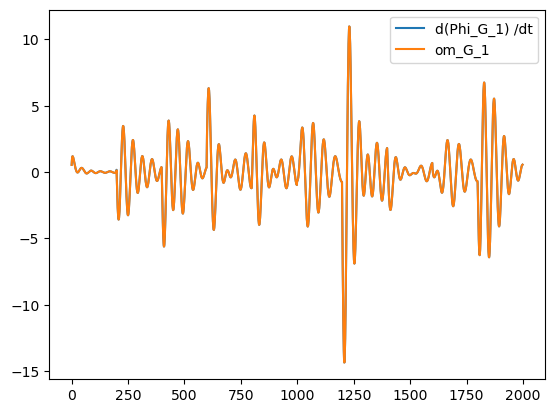

In [60]:
data_matrix_df_smooth_appended[['d(Phi_G_1) /dt', 'om_G_1']].plot()

<Axes: >

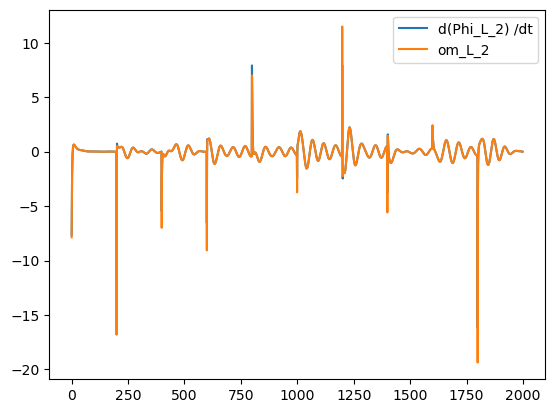

In [61]:
ind = "L_2"
data_matrix_df_smooth_appended[['d(Phi_{}) /dt'.format(ind), 'om_{}'.format(ind)]].plot()


In [62]:
ind = "L_2"


(abs(data_matrix_df_smooth_appended['d(Phi_{}) /dt'.format(ind)] - data_matrix_df_smooth_appended['om_{}'.format(ind)])).sum()


25.320776237433826

In [63]:
abs(data_matrix_df_smooth_appended['d(Phi_{}) /dt'.format(ind)]).sum()

845.5452266200612

In [64]:
scaled_refined_lib[power_features + freq_features]

,P_G_1,P_G_2,P_G_3,P_G_4,P_G_5,P_G_6,P_G_7,P_G_8,P_G_9,P_G_10,...,om_L_20,om_L_21,om_L_22,om_L_23,om_L_24,om_L_25,om_L_26,om_L_27,om_L_28,om_L_29
0,0.05359212,0.73697129,0.65354873,0.89839929,0.94150307,0.93427618,0.87468066,0.55001551,2.68692214,1.20674367,...,-4.91082631,-8.18264418,-5.55887568,-5.47171505,-10.40659611,-7.13432059,-10.54129056,-13.47208230,-5.97591375,-5.13022621
1,0.61073098,1.36959193,1.38316549,1.34346746,1.32056790,1.42817462,1.18605397,0.93434045,3.57429127,1.80679509,...,-2.20325146,-4.71276565,-3.16246199,-3.11619491,-5.99256098,-3.82841384,-5.94962675,-7.69056673,-3.39835567,-2.87319027
2,0.95511769,1.78664339,1.89235975,1.59861965,1.52274900,1.73446899,1.37672449,1.16238927,4.10873694,2.12715043,...,-1.04544518,-2.56402697,-1.64582037,-1.62698623,-3.31098908,-1.99253446,-3.22124705,-4.24029277,-1.79062965,-1.46404722
3,1.17884242,2.05872128,2.22846936,1.75433704,1.64267960,1.92280349,1.49182886,1.30199230,4.42615781,2.32288516,...,-0.39103631,-1.25562455,-0.72590154,-0.72297153,-1.67515273,-0.91403636,-1.59663122,-2.17005586,-0.83293010,-0.62603316
4,1.32925362,2.23446769,2.44740218,1.85038769,1.71467134,2.03789775,1.56047929,1.38852054,4.61278388,2.44188884,...,0.00147777,-0.45534079,-0.16824106,-0.17428173,-0.66991999,-0.26051599,-0.61353059,-0.90952902,-0.26028420,-0.12694081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1.24877263,2.00503296,2.64155744,2.27407088,1.44806198,2.02262938,1.63997491,1.68867666,4.58536264,2.45891397,...,0.37040642,-0.05473577,-0.03023746,0.01942532,-0.06912638,-0.09486545,-0.31364306,-0.25229864,-0.44533064,-0.54343446
1995,1.28320285,1.96072325,2.65826605,2.13713892,1.59178489,2.00988721,1.66150049,1.65781461,4.52757835,2.51772111,...,0.37372959,-0.05935712,-0.03345488,0.01403535,-0.07543049,-0.10643828,-0.31858324,-0.25838216,-0.44252246,-0.53765634
1996,1.32120459,1.92225706,2.67293996,1.99800124,1.73677205,1.99836999,1.68194064,1.62430884,4.47273388,2.57460856,...,0.37143651,-0.06270958,-0.03589299,0.00861618,-0.08014495,-0.11676696,-0.32074114,-0.26187036,-0.43643114,-0.52800697
1997,1.36180346,1.89012475,2.68535514,1.85928194,1.88048415,1.98825602,1.70094618,1.58874619,4.42111932,2.62897478,...,0.36370859,-0.06477218,-0.03756230,0.00322430,-0.08321001,-0.12574697,-0.32012681,-0.26274789,-0.42717568,-0.51465360


In [65]:
from dae_finder import sequentialThLin, AlgModelFinder
from sklearn.linear_model import LinearRegression

# lin_reg_model = LinearRegression
# lin_reg_model_arg = {"fit_intercept": True}
# seq_th_model = sequentialThLin(custom_model=True,
#                                custom_model_ob = lin_reg_model,
#                                custom_model_arg= lin_reg_model_arg,
#                               coef_threshold=0.1)


ind = "L_2"
seq_th_model = sequentialThLin(model_id="lasso", alpha=0.3, coef_threshold=0.1, fit_intercept=True)
# seq_th_model = sequentialThLin(model_id="RR", alpha=0.3, coef_threshold=0.1, fit_intercept=True)


seq_th_model.fit(X=scaled_refined_lib[power_features + phase_features+ freq_features], y=data_matrix_df_smooth_appended['om_{}'.format(ind)])
seq_th_model.score(X=scaled_refined_lib[power_features + phase_features+freq_features], y=data_matrix_df_smooth_appended['om_{}'.format(ind)])

# seq_th_model.fit(X=scaled_refined_lib[power_features + phase_features+ freq_features], y=data_matrix_df_smooth_appended['d(om_{}) /dt'.format(ind)])
# seq_th_model.score(X=scaled_refined_lib[power_features + phase_features+freq_features], y=data_matrix_df_smooth_appended['d(om_{}) /dt'.format(ind)])

Sequential threshold converged in 1 iterations


0.8969634801335428

In [66]:
coef_dict = dict(zip(seq_th_model.feature_names_in_, seq_th_model.coef_))
coef_dict

{'P_G_1': 0.0,
 'P_G_2': 0.0,
 'P_G_3': 0.0,
 'P_G_4': 0.0,
 'P_G_5': 0.0,
 'P_G_6': 0.0,
 'P_G_7': 0.0,
 'P_G_8': 0.0,
 'P_G_9': 0.0,
 'P_G_10': 0.0,
 'P_T_1': 0.0,
 'P_T_2': 0.0,
 'P_T_3': 0.0,
 'P_T_4': 0.0,
 'P_T_5': 0.0,
 'P_T_6': 0.0,
 'P_T_7': 0.0,
 'P_T_8': 0.0,
 'P_T_9': 0.0,
 'P_T_10': 0.0,
 'P_L_1': 0.0,
 'P_L_2': -0.6345997572676695,
 'P_L_3': 0.0,
 'P_L_4': 0.0,
 'P_L_5': 0.0,
 'P_L_6': 0.0,
 'P_L_7': 0.0,
 'P_L_8': 0.0,
 'P_L_9': 0.0,
 'P_L_10': 0.0,
 'P_L_11': 0.0,
 'P_L_12': 0.0,
 'P_L_13': 0.0,
 'P_L_14': 0.0,
 'P_L_15': 0.0,
 'P_L_16': 0.0,
 'P_L_17': 0.0,
 'P_L_18': 0.0,
 'P_L_19': 0.0,
 'P_L_20': 0.0,
 'P_L_21': 0.0,
 'P_L_22': 0.0,
 'P_L_23': 0.0,
 'P_L_24': 0.0,
 'P_L_25': 0.0,
 'P_L_26': 0.0,
 'P_L_27': 0.0,
 'P_L_28': 0.0,
 'P_L_29': 0.0,
 'Phi_G_1': 0.0,
 'Phi_G_2': 0.0,
 'Phi_G_3': 0.0,
 'Phi_G_4': 0.0,
 'Phi_G_5': 0.0,
 'Phi_G_6': 0.0,
 'Phi_G_7': 0.0,
 'Phi_G_8': 0.0,
 'Phi_G_9': 0.0,
 'Phi_G_10': 0.0,
 'Phi_T_1': 0.0,
 'Phi_T_2': 0.0,
 'Phi_T_3': 0.0,
 'Phi

### Discovering all dynamic equations

- Note that frequencies need to be discovered only for non-generator nodes
- Time derivative of frequencies need to be discovered for generators

In [67]:
#Collecting the feature names to fit: This will be d/dt(omega) for generators and omega for non-generator nodes

d_omega_gen_features = [feat for feat in data_matrix_df_smooth_appended.columns if "d(om_G" in feat]
freq_non_gen_features = [feat for feat in freq_features if "G" not in feat]

dynamic_feat_to_fit = d_omega_gen_features + freq_non_gen_features
dynamic_feat_to_fit

['d(om_G_1) /dt',
 'd(om_G_2) /dt',
 'd(om_G_3) /dt',
 'd(om_G_4) /dt',
 'd(om_G_5) /dt',
 'd(om_G_6) /dt',
 'd(om_G_7) /dt',
 'd(om_G_8) /dt',
 'd(om_G_9) /dt',
 'd(om_G_10) /dt',
 'om_T_1',
 'om_T_2',
 'om_T_3',
 'om_T_4',
 'om_T_5',
 'om_T_6',
 'om_T_7',
 'om_T_8',
 'om_T_9',
 'om_T_10',
 'om_L_1',
 'om_L_2',
 'om_L_3',
 'om_L_4',
 'om_L_5',
 'om_L_6',
 'om_L_7',
 'om_L_8',
 'om_L_9',
 'om_L_10',
 'om_L_11',
 'om_L_12',
 'om_L_13',
 'om_L_14',
 'om_L_15',
 'om_L_16',
 'om_L_17',
 'om_L_18',
 'om_L_19',
 'om_L_20',
 'om_L_21',
 'om_L_22',
 'om_L_23',
 'om_L_24',
 'om_L_25',
 'om_L_26',
 'om_L_27',
 'om_L_28',
 'om_L_29']

In [68]:
combined_features = power_features + phase_features+ freq_features

dynamic_feature_to_libr_map = {feat: [comb_feat for comb_feat in combined_features if feat != comb_feat]
                              for feat in dynamic_feat_to_fit}

In [69]:
scaled_refined_lib[power_features + phase_features+ freq_features]

,P_G_1,P_G_2,P_G_3,P_G_4,P_G_5,P_G_6,P_G_7,P_G_8,P_G_9,P_G_10,...,om_L_20,om_L_21,om_L_22,om_L_23,om_L_24,om_L_25,om_L_26,om_L_27,om_L_28,om_L_29
0,0.05359212,0.73697129,0.65354873,0.89839929,0.94150307,0.93427618,0.87468066,0.55001551,2.68692214,1.20674367,...,-4.91082631,-8.18264418,-5.55887568,-5.47171505,-10.40659611,-7.13432059,-10.54129056,-13.47208230,-5.97591375,-5.13022621
1,0.61073098,1.36959193,1.38316549,1.34346746,1.32056790,1.42817462,1.18605397,0.93434045,3.57429127,1.80679509,...,-2.20325146,-4.71276565,-3.16246199,-3.11619491,-5.99256098,-3.82841384,-5.94962675,-7.69056673,-3.39835567,-2.87319027
2,0.95511769,1.78664339,1.89235975,1.59861965,1.52274900,1.73446899,1.37672449,1.16238927,4.10873694,2.12715043,...,-1.04544518,-2.56402697,-1.64582037,-1.62698623,-3.31098908,-1.99253446,-3.22124705,-4.24029277,-1.79062965,-1.46404722
3,1.17884242,2.05872128,2.22846936,1.75433704,1.64267960,1.92280349,1.49182886,1.30199230,4.42615781,2.32288516,...,-0.39103631,-1.25562455,-0.72590154,-0.72297153,-1.67515273,-0.91403636,-1.59663122,-2.17005586,-0.83293010,-0.62603316
4,1.32925362,2.23446769,2.44740218,1.85038769,1.71467134,2.03789775,1.56047929,1.38852054,4.61278388,2.44188884,...,0.00147777,-0.45534079,-0.16824106,-0.17428173,-0.66991999,-0.26051599,-0.61353059,-0.90952902,-0.26028420,-0.12694081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1.24877263,2.00503296,2.64155744,2.27407088,1.44806198,2.02262938,1.63997491,1.68867666,4.58536264,2.45891397,...,0.37040642,-0.05473577,-0.03023746,0.01942532,-0.06912638,-0.09486545,-0.31364306,-0.25229864,-0.44533064,-0.54343446
1995,1.28320285,1.96072325,2.65826605,2.13713892,1.59178489,2.00988721,1.66150049,1.65781461,4.52757835,2.51772111,...,0.37372959,-0.05935712,-0.03345488,0.01403535,-0.07543049,-0.10643828,-0.31858324,-0.25838216,-0.44252246,-0.53765634
1996,1.32120459,1.92225706,2.67293996,1.99800124,1.73677205,1.99836999,1.68194064,1.62430884,4.47273388,2.57460856,...,0.37143651,-0.06270958,-0.03589299,0.00861618,-0.08014495,-0.11676696,-0.32074114,-0.26187036,-0.43643114,-0.52800697
1997,1.36180346,1.89012475,2.68535514,1.85928194,1.88048415,1.98825602,1.70094618,1.58874619,4.42111932,2.62897478,...,0.36370859,-0.06477218,-0.03756230,0.00322430,-0.08321001,-0.12574697,-0.32012681,-0.26274789,-0.42717568,-0.51465360


In [70]:
data_matrix_df_smooth_appended[d_omega_gen_features]

,d(om_G_1) /dt,d(om_G_2) /dt,d(om_G_3) /dt,d(om_G_4) /dt,d(om_G_5) /dt,d(om_G_6) /dt,d(om_G_7) /dt,d(om_G_8) /dt,d(om_G_9) /dt,d(om_G_10) /dt
0,43.28694640,31.75159234,34.74779808,24.06402422,21.03690089,24.91023417,20.76459229,28.29195527,19.58572006,22.34962965
1,25.29588714,19.31616727,21.25196544,13.73868336,11.79156596,13.77192008,11.78447305,16.25417461,10.91835007,11.87502594
2,13.39618476,10.77380772,11.75267788,7.19182026,6.13506281,6.49154058,5.97583278,8.54097451,5.37927422,5.35374055
3,5.97221938,5.31331153,5.54909942,3.36977491,2.97444226,2.14220046,2.56984376,3.99444357,2.18698844,1.60497490
4,0.98989902,1.77730590,1.51812763,0.97762052,1.03384357,-0.52697874,0.52636939,1.14730406,0.29403736,-0.72672979
...,...,...,...,...,...,...,...,...,...,...
1994,5.48719924,7.87239029,-1.28267565,-7.04105401,6.15148325,0.62852799,-1.56929580,-6.95741293,1.62907727,-1.28259904
1995,4.24791280,8.67202049,-1.57384782,-3.62571403,2.30304022,0.91496365,-2.18189690,-5.88213043,2.19603434,-2.41304414
1996,2.92410376,9.34826613,-1.82532326,-0.18885958,-1.53276325,1.17059072,-2.75609033,-4.73356265,2.72931169,-3.49948454
1997,1.55239268,9.89208636,-2.03317568,3.19914382,-5.28328984,1.39136008,-3.28126270,-3.53348233,3.22605172,-4.52955664


In [71]:
refined_candid_lib_appended = pd.concat((scaled_refined_lib, data_matrix_df_smooth_appended[d_omega_gen_features]), axis=1)

refined_candid_lib_appended

,Phi_G_1,Phi_G_2,Phi_G_3,Phi_G_4,Phi_G_5,Phi_G_6,Phi_G_7,Phi_G_8,Phi_G_9,Phi_G_10,...,d(om_G_1) /dt,d(om_G_2) /dt,d(om_G_3) /dt,d(om_G_4) /dt,d(om_G_5) /dt,d(om_G_6) /dt,d(om_G_7) /dt,d(om_G_8) /dt,d(om_G_9) /dt,d(om_G_10) /dt
0,-0.47531965,0.01027664,0.06740695,0.10734445,-0.00970463,0.26689505,0.40676168,-0.02226610,0.48927667,-1.05784626,...,43.28694640,31.75159234,34.74779808,24.06402422,21.03690089,24.91023417,20.76459229,28.29195527,19.58572006,22.34962965
1,-0.44180695,0.03604682,0.09621382,0.12949289,0.00962733,0.28833795,0.42195591,-0.00355729,0.50842828,-1.03578618,...,25.29588714,19.31616727,21.25196544,13.73868336,11.79156596,13.77192008,11.78447305,16.25417461,10.91835007,11.87502594
2,-0.39639619,0.07115812,0.13597807,0.15852005,0.03449203,0.31664916,0.44196321,0.02128923,0.53352986,-1.00820122,...,13.39618476,10.77380772,11.75267788,7.19182026,6.13506281,6.49154058,5.97583278,8.54097451,5.37927422,5.35374055
3,-0.34459895,0.11153189,0.18185508,0.19120799,0.06229173,0.34826063,0.46445008,0.04940965,0.56161530,-0.97805219,...,5.97221938,5.31331153,5.54909942,3.36977491,2.97444226,2.14220046,2.56984376,3.99444357,2.18698844,1.60497490
4,-0.28994642,0.15451314,0.23064269,0.22561025,0.09150665,0.38098655,0.48801132,0.07906267,0.59092538,-0.94711938,...,0.98989902,1.77730590,1.51812763,0.97762052,1.03384357,-0.52697874,0.52636939,1.14730406,0.29403736,-0.72672979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1.10887190,1.39165627,1.81729891,2.05569612,1.34422778,1.90358945,1.79662304,1.46856608,2.30593139,0.41362093,...,5.48719924,7.87239029,-1.28267565,-7.04105401,6.15148325,0.62852799,-1.56929580,-6.95741293,1.62907727,-1.28259904
1995,1.13048321,1.36330413,1.82729489,1.97052358,1.44722967,1.89586155,1.81137361,1.44522927,2.26101110,0.46099235,...,4.24791280,8.67202049,-1.57384782,-3.62571403,2.30304022,0.91496365,-2.18189690,-5.88213043,2.19603434,-2.41304414
1996,1.15405736,1.33908003,1.83649302,1.88356790,1.55129360,1.88857977,1.82525110,1.41971267,2.21726225,0.50726319,...,2.92410376,9.34826613,-1.82532326,-0.18885958,-1.53276325,1.17059072,-2.75609033,-4.73356265,2.72931169,-3.49948454
1997,1.17898318,1.31930589,1.84476571,1.79651710,1.65465445,1.88186893,1.83802576,1.39244164,2.17496953,0.55193768,...,1.55239268,9.89208636,-2.03317568,3.19914382,-5.28328984,1.39136008,-3.28126270,-3.53348233,3.22605172,-4.52955664


In [72]:
from dae_finder import sequentialThLin, AlgModelFinder
# from sklearn.linear_model import LinearRegression

# lin_reg_model = LinearRegression
# lin_reg_model_arg = {"fit_intercept": True}
# seq_th_model = sequentialThLin(custom_model=True,
#                                custom_model_ob = lin_reg_model,
#                                custom_model_arg= lin_reg_model_arg,
#                               coef_threshold=0.1)
# seq_th_model = sequentialThLin(coef_threshold=0.1, alpha=0.1, fit_intercept=True)
seq_th_model = sequentialThLin(model_id="lasso", alpha=0.3, coef_threshold=0.1, fit_intercept=True)


dynamic_model_th = AlgModelFinder(custom_model=True, custom_model_ob=seq_th_model)

dynamic_model_th.fit(X=refined_candid_lib_appended,
                     scale_columns=False,
                     features_to_fit=dynamic_feat_to_fit,
                     feature_to_library_map_=dynamic_feature_to_libr_map)

Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential threshold converged in 1 iterations
Sequential th

AlgModelFinder(custom_model=True,
               custom_model_ob=<dae_finder.sequentialThLin object at 0x135658950>)

In [73]:
dynamic_model_th.best_models()

,d(om_G_8) /dt,d(om_G_7) /dt,d(om_G_1) /dt,d(om_G_4) /dt,d(om_G_5) /dt,d(om_G_6) /dt,d(om_G_2) /dt,d(om_G_3) /dt,d(om_G_10) /dt,d(om_G_9) /dt,...,om_T_6,om_T_9,om_T_10,om_T_8,om_T_3,om_T_7,om_T_4,om_T_5,om_T_2,om_T_1
P_G_1,0.00000000,0.00000000,-32.08313649,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
P_G_2,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-19.53617812,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
P_G_3,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,-17.91914706,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
P_G_4,0.00000000,0.00000000,0.00000000,-24.23010589,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
P_G_5,0.00000000,0.00000000,0.00000000,0.00000000,-26.04506873,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
om_L_26,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
om_L_27,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
om_L_28,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
om_L_29,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


In [74]:
fitted_dynamic_models = dynamic_model_th.best_models()

In [75]:
for ind in range(1,11):
    print(fitted_dynamic_models["d(om_G_{}) /dt".format(ind)][abs(fitted_dynamic_models["d(om_G_{}) /dt".format(ind)]) > 0.1])

P_G_1        -32.08313649
om_G_1        -5.32328844
r2- metric     0.99968518
Name: d(om_G_1) /dt, dtype: float64
P_G_2        -19.53617812
om_G_2        -1.43339344
r2- metric     0.99945806
Name: d(om_G_2) /dt, dtype: float64
P_G_3        -17.91914706
om_G_3        -1.18945878
r2- metric     0.99939049
Name: d(om_G_3) /dt, dtype: float64
P_G_4        -24.23010589
om_G_4        -1.50571442
r2- metric     0.99959231
Name: d(om_G_4) /dt, dtype: float64
P_G_5        -26.04506873
om_G_5        -2.22262688
r2- metric     0.99954974
Name: d(om_G_5) /dt, dtype: float64
P_G_6        -22.74046978
om_G_6        -1.40901692
r2- metric     0.99953908
Name: d(om_G_6) /dt, dtype: float64
P_G_7        -29.06455265
om_G_7        -2.33560433
r2- metric     0.99971215
Name: d(om_G_7) /dt, dtype: float64
P_G_8        -32.07188498
om_G_8        -2.80697593
r2- metric     0.99975086
Name: d(om_G_8) /dt, dtype: float64
P_G_9        -9.70588706
om_G_9       -0.52080192
r2- metric    0.99776372
Name: d(om_G_

In [76]:
for ind in range(1,11):
    print(fitted_dynamic_models["om_T_{}".format(ind)][abs(fitted_dynamic_models["om_T_{}".format(ind)]) > 0.1])

P_L_2        -0.63577397
r2- metric    0.78567292
Name: om_T_1, dtype: float64
P_L_6        -0.20681925
om_G_2        0.54454932
r2- metric    0.83901626
Name: om_T_2, dtype: float64
P_L_10       -0.22346355
om_G_3        0.52757055
r2- metric    0.86658318
Name: om_T_3, dtype: float64
P_L_19       -0.35798980
om_G_4        0.41338864
r2- metric    0.86240876
Name: om_T_4, dtype: float64
P_L_20       -0.45709296
om_G_5        0.30770863
r2- metric    0.85732867
Name: om_T_5, dtype: float64
P_L_22       -0.34415694
om_G_6        0.40684407
r2- metric    0.87783883
Name: om_T_6, dtype: float64
P_L_23       -0.19367707
om_G_7        0.54564850
r2- metric    0.86247630
Name: om_T_7, dtype: float64
P_T_8        -0.36077161
P_L_25       -0.12290736
om_G_8        0.22475581
r2- metric    0.87407082
Name: om_T_8, dtype: float64
P_T_9        -0.68377441
r2- metric    0.87781209
Name: om_T_9, dtype: float64
P_T_10       -0.47366830
P_L_9        -0.10859123
om_G_10       0.11791372
r2- metric    

In [77]:
for ind in range(1,30):
    print(fitted_dynamic_models["om_L_{}".format(ind)][abs(fitted_dynamic_models["om_L_{}".format(ind)]) > 0.1])

P_L_1        -0.70000000
r2- metric    0.91000000
Name: om_L_1, dtype: float64
P_L_2        -0.70000000
r2- metric    0.91000000
Name: om_L_2, dtype: float64
P_L_3        -0.70000000
r2- metric    0.91000000
Name: om_L_3, dtype: float64
P_L_4        -0.70000000
r2- metric    0.91000000
Name: om_L_4, dtype: float64
P_L_5        -0.70000000
r2- metric    0.91000000
Name: om_L_5, dtype: float64
P_L_6        -0.70000000
r2- metric    0.91000000
Name: om_L_6, dtype: float64
P_L_7        -0.70000000
r2- metric    0.91000000
Name: om_L_7, dtype: float64
P_L_8        -0.70000000
r2- metric    0.91000000
Name: om_L_8, dtype: float64
P_L_9        -0.70000000
r2- metric    0.91000000
Name: om_L_9, dtype: float64
P_L_10       -0.70000000
r2- metric    0.91000000
Name: om_L_10, dtype: float64
P_L_11       -0.70000000
r2- metric    0.91000000
Name: om_L_11, dtype: float64
P_L_12       -0.70000000
r2- metric    0.91000000
Name: om_L_12, dtype: float64
P_L_13       -0.70000000
r2- metric    0.91000000

In [168]:
data_matrix_df_smooth_appended['d(om_{}) /dt'.format(ind)].describe()

In [151]:
from dae_finder import sequentialThLin, AlgModelFinder
from sklearn.linear_model import LinearRegression

# lin_reg_model = LinearRegression
# lin_reg_model_arg = {"fit_intercept": True}
# seq_th_model = sequentialThLin(custom_model=True,
#                                custom_model_ob = lin_reg_model,
#                                custom_model_arg= lin_reg_model_arg,
#                               coef_threshold=0.1)


ind = "G_3"
seq_th_model = sequentialThLin(model_id="lasso", alpha=0.3, coef_threshold=0.1, fit_intercept=True)
# seq_th_model = sequentialThLin(model_id="RR", alpha=0.3, coef_threshold=0.1, fit_intercept=True)


# seq_th_model.fit(X=scaled_refined_lib[power_features + phase_features+ freq_features], y=data_matrix_df_smooth_appended['om_{}'.format(ind)])
# seq_th_model.score(X=scaled_refined_lib[power_features + phase_features+freq_features], y=data_matrix_df_smooth_appended['om_{}'.format(ind)])

seq_th_model.fit(X=scaled_refined_lib[power_features + phase_features+ freq_features], y=data_matrix_df_smooth_appended['d(om_{}) /dt'.format(ind)])
seq_th_model.score(X=scaled_refined_lib[power_features + phase_features+freq_features], y=data_matrix_df_smooth_appended['d(om_{}) /dt'.format(ind)])

In [152]:
coef_dict = dict(zip(seq_th_model.feature_names_in_, seq_th_model.coef_))
coef_dict

In [253]:
seq_th_model.intercept_

In [231]:
non_zero_feat = [feat for feat, coef in coef_dict.items() if abs(coef) > 0.01]
non_zero_feat

In [232]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X=scaled_refined_lib[non_zero_feat], y=data_matrix_df_smooth_appended['d(om_{}) /dt'.format(ind)])
lin_model.score(X=scaled_refined_lib[non_zero_feat], y=data_matrix_df_smooth_appended['d(om_{}) /dt'.format(ind)])

In [233]:
dict(zip(lin_model.feature_names_in_, lin_model.coef_))

In [234]:
scaled_refined_lib[non_zero_feat]

In [244]:
from sklearn import decomposition
pca_1 = decomposition.PCA()

refined_features = ["Phi_{}".format(ind), "P_{}".format(ind), "om_{}".format(ind)]
pca_1.fit(scaled_refined_lib[refined_features])

var_expl_ratio = pca_1.explained_variance_ratio_
var_expl_ratio

In [245]:
pca_1.components_

In [246]:
scaled_refined_lib[refined_features].corr()

In [243]:
scaled_refined_lib[]

In [224]:
from numpy import linalg

In [225]:
linalg.cond(scaled_refined_lib[non_zero_feat])

In [247]:
linalg.cond(sin_diff_library)

In [248]:
feature_to_libr_map

### Full candidate library is unable to find the model 

In [62]:
seq_th_model.fit(X=scaled_cand_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])
seq_th_model.score(X=scaled_cand_lib, y=data_matrix_df_smooth_appended['d(om_0) /dt'])

In [63]:
dict(zip(seq_th_model.feature_names_in_, seq_th_model.coef_))